# Imports

In [1]:
library("BayesFactor")
library("MCMCpack")

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Loading required package: MASS

##
## Markov Chain Monte Carlo Package (MCMCpack)

## Copyright (C) 2003-2021 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park

##
## Support provided by the U.S. National Science Foundation

## (Grants SES-0350646 and SES-0350613)
##



# Read Data

## US Vaccination Records

* DTP1 = First dose of Diphtheria/Pertussis/Tetanus vaccine; 
* HepB_BD = Hepatitis B, Birth Dose; 
* Pol3 = Polio third dose;
* Hib3 – Influenza third dose; 
* MCV1 = Measles first dose!

In [2]:
load("Data/usVaccines.RData")
str(usVaccines)
head(usVaccines)

 Time-Series [1:38, 1:5] from 1980 to 2017: 83 84 83 84 84 85 88 88 89 81 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:5] "DTP1" "HepB_BD" "Pol3" "Hib3" ...


DTP1,HepB_BD,Pol3,Hib3,MCV1
83,16,95,85,86
84,16,96,85,97
83,17,97,84,97
84,17,97,83,98
84,16,97,85,98
85,17,96,85,97


## School Reports

In [3]:
load("Data/allSchoolsReportStatus.RData")
str(allSchoolsReportStatus)
head(allSchoolsReportStatus)

'data.frame':	7381 obs. of  3 variables:
 $ name    : chr  "AGUA DULCE ELEMENTARY" "MEADOWLARK ELEMENTARY" "CALIFORNIA SCHOOL FOR THE DEAF-FREMONT" "HIDDEN VALLEY ELEMENTARY" ...
 $ pubpriv : chr  "PUBLIC" "PUBLIC" "PUBLIC" "PUBLIC" ...
 $ reported: chr  "Y" "Y" "Y" "Y" ...


,name,pubpriv,reported
,<chr>,<chr>,<chr>
1,AGUA DULCE ELEMENTARY,PUBLIC,Y
2,MEADOWLARK ELEMENTARY,PUBLIC,Y
3,CALIFORNIA SCHOOL FOR THE DEAF-FREMONT,PUBLIC,Y
4,HIDDEN VALLEY ELEMENTARY,PUBLIC,Y
5,MANOR ELEMENTARY,PUBLIC,Y
6,BROOKSIDE ELEMENTARY,PUBLIC,Y


## District 

In [4]:
load("Data/districts21.RData")
str(districts)
head(districts)

'data.frame':	700 obs. of  13 variables:
 $ DistrictName    : chr  "Belleview Elementary" "Luther Burbank" "South Whittier Elementary" "Lawndale Elementary" ...
 $ WithoutDTP      : num  20 5 7 8 9 9 7 2 1 12 ...
 $ WithoutPolio    : num  20 4 7 8 8 9 6 2 1 12 ...
 $ WithoutMMR      : num  20 1 6 9 9 9 6 2 1 15 ...
 $ WithoutHepB     : num  20 2 2 3 4 4 3 2 1 8 ...
 $ PctUpToDate     : num  80 92 88 89 89 90 93 98 99 85 ...
 $ DistrictComplete: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ PctBeliefExempt : num  20 0 0 1 2 0 2 0 1 0 ...
 $ PctChildPoverty : num  13 24 27 28 23 32 4 28 17 31 ...
 $ PctFreeMeal     : num  51 80 74 71 38 64 0 78 25 45 ...
 $ PctFamilyPoverty: num  9 12 12 12 30 20 2 15 2 12 ...
 $ Enrolled        : num  20 96 357 674 1037 ...
 $ TotalSchools    : num  1 1 5 6 15 11 3 1 1 1 ...


,DistrictName,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,PctUpToDate,DistrictComplete,PctBeliefExempt,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
577,Belleview Elementary,20,20,20,20,80,TRUE,20,13,51,9,20,1
442,Luther Burbank,5,4,1,2,92,TRUE,0,24,80,12,96,1
112,South Whittier Elementary,7,7,6,2,88,TRUE,0,27,74,12,357,5
97,Lawndale Elementary,8,8,9,3,89,TRUE,1,28,71,12,674,6
351,Jefferson Elementary,9,8,9,4,89,TRUE,2,23,38,30,1037,15
5,National Elementary,9,9,9,4,90,TRUE,0,32,64,20,874,11


# Introductory / Descriptive Reports

## Question 1
1.	How have U.S. vaccination rates varied over time? Are vaccination rates increasing or decreasing? Which vaccination has the highest rate at the conclusion of the time series? Which vaccination has the lowest rate at the conclusion of the time series? Which vaccine has the greatest volatility?

* DTP1 = First dose of Diphtheria/Pertussis/Tetanus vaccine; 
* HepB_BD = Hepatitis B, Birth Dose; 
* Pol3 = Polio third dose;
* Hib3 – Influenza third dose; 
* MCV1 = Measles first dose!

In [5]:
head(usVaccines, 1)
tail(usVaccines, 1)

DTP1,HepB_BD,Pol3,Hib3,MCV1
83,16,95,85,86


,DTP1,HepB_BD,Pol3,Hib3,MCV1
"[38,]",98,64,94,93,92


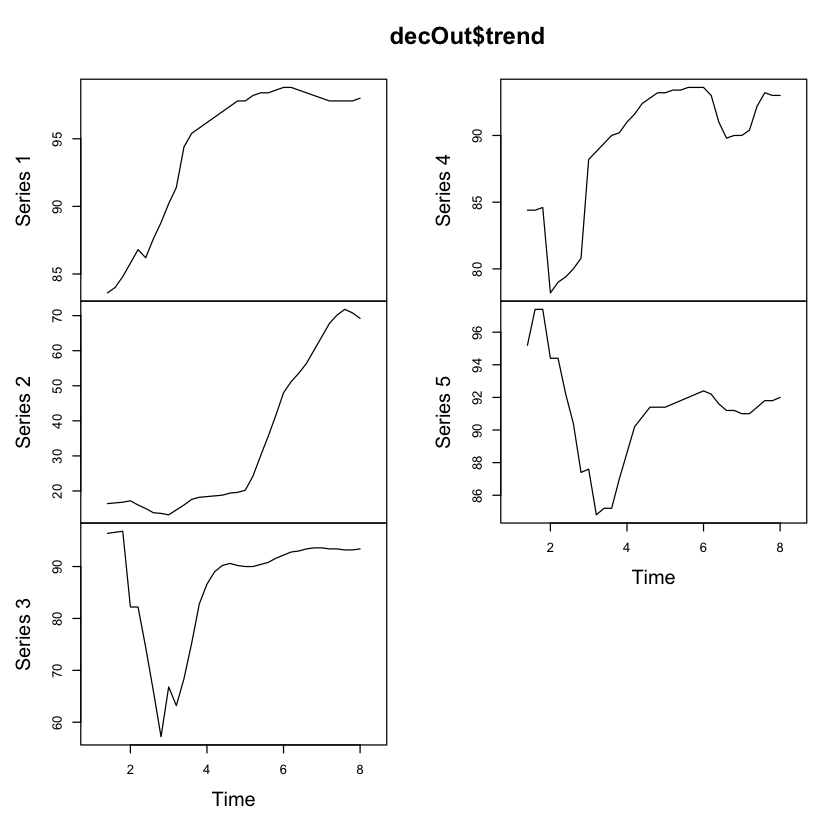

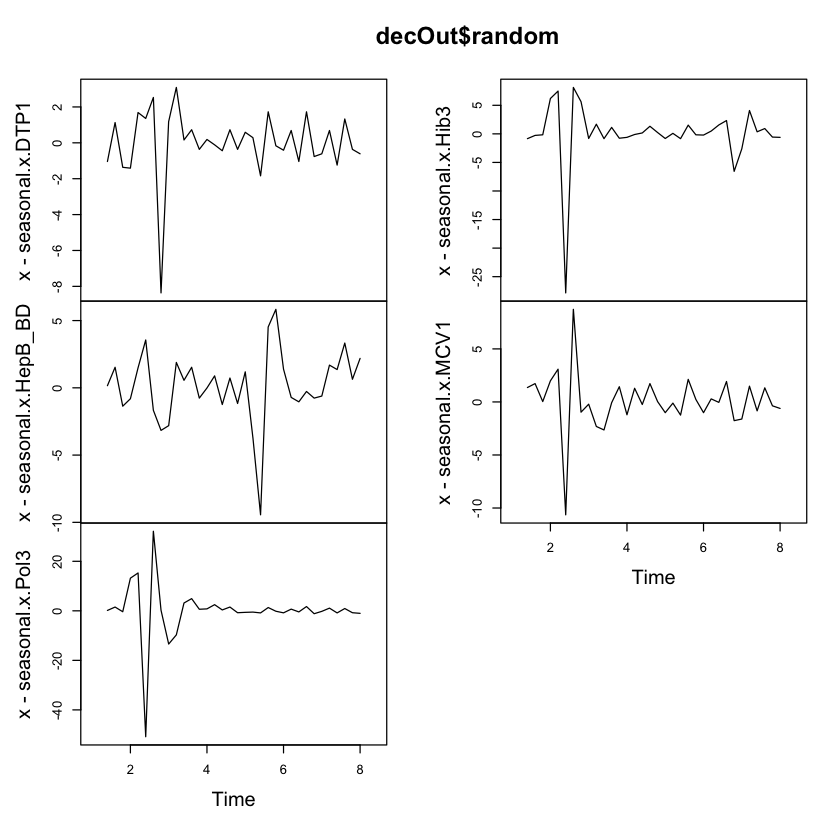

In [179]:
decOut = decompose(ts(usVaccines, frequency=5))
plot(decOut$trend)
plot(decOut$random)

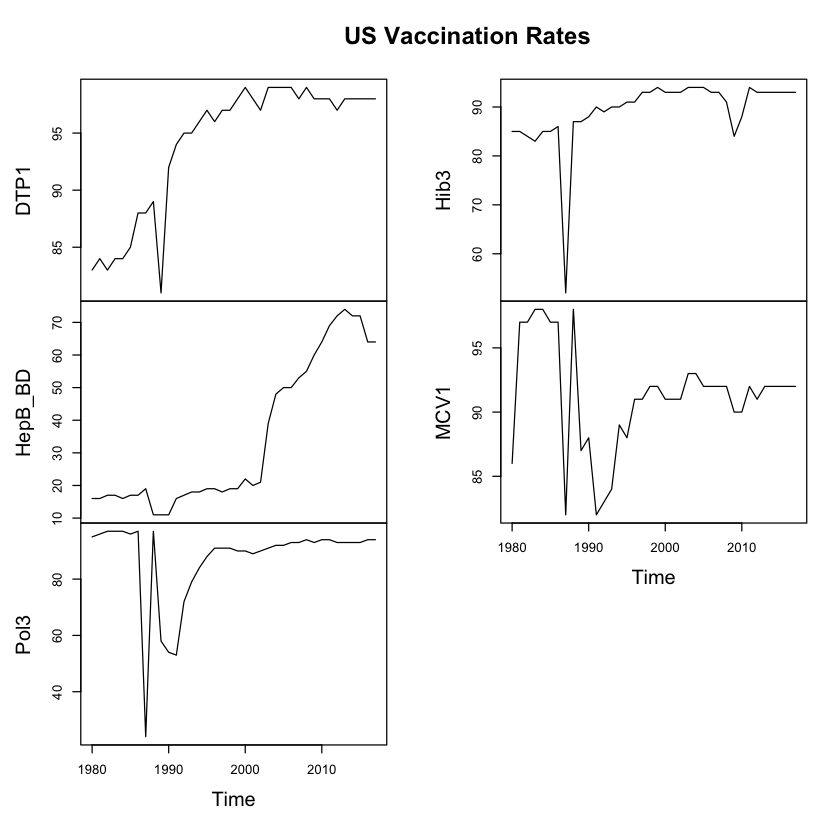

In [165]:
plot(usVaccines, main='US Vaccination Rates', ylim=c(0, 100))

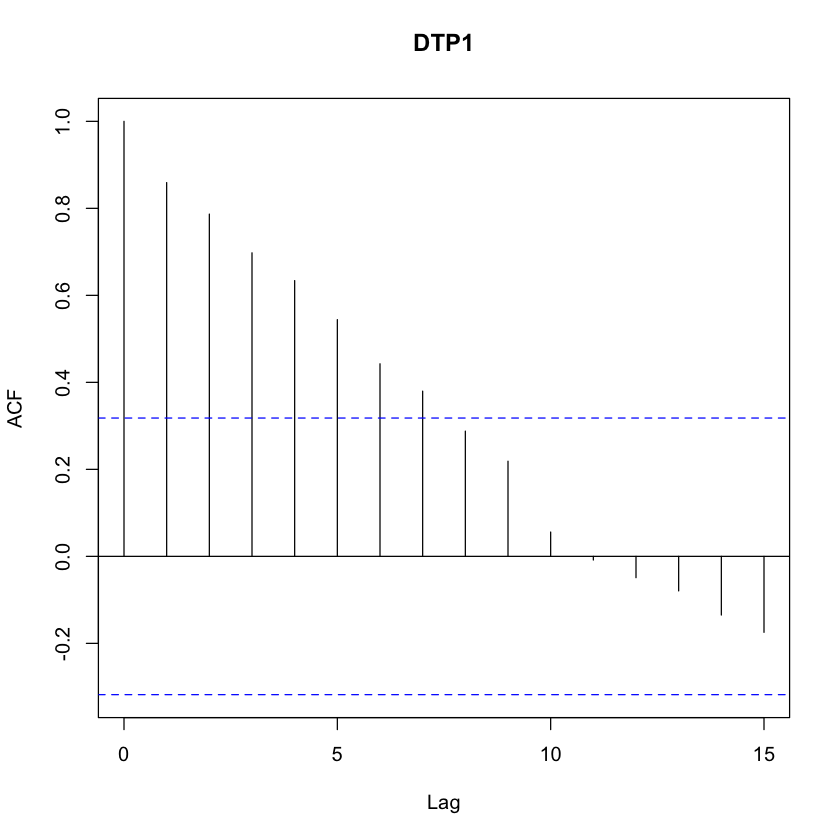

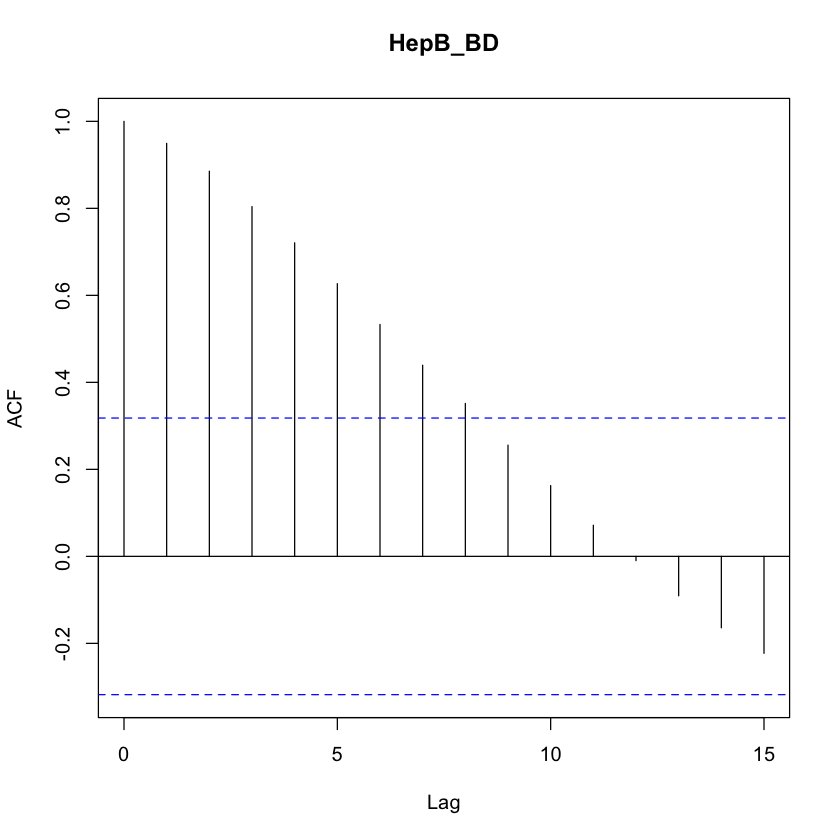

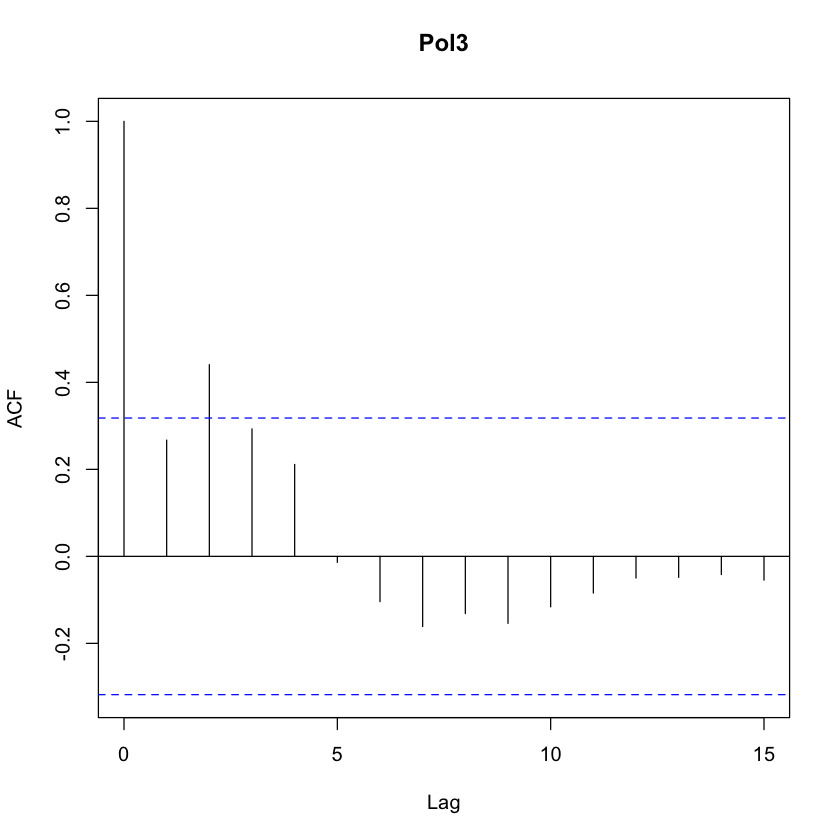

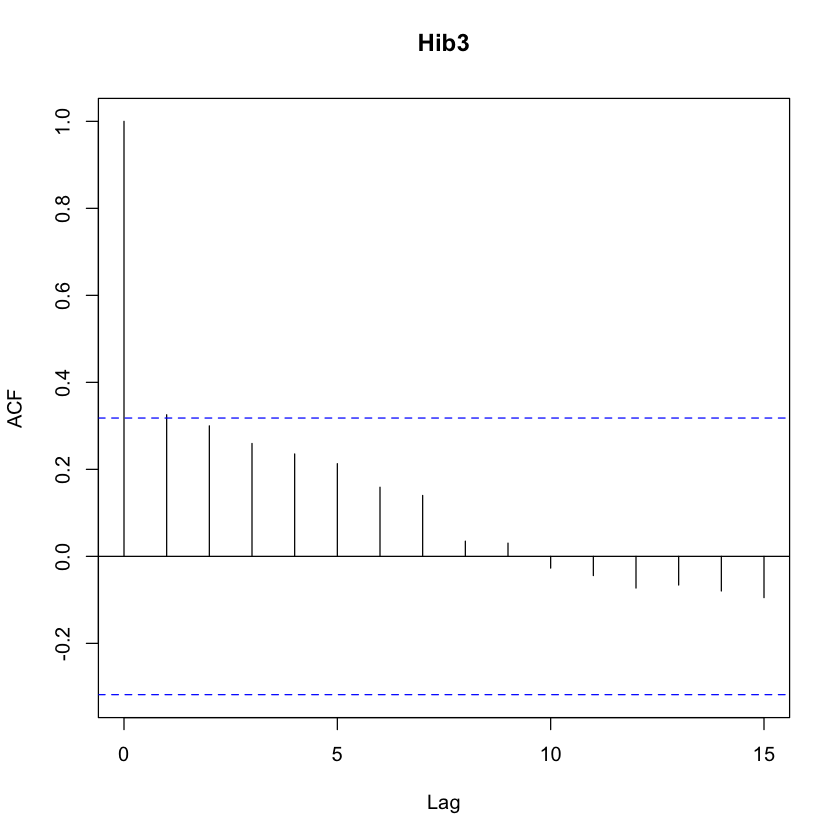

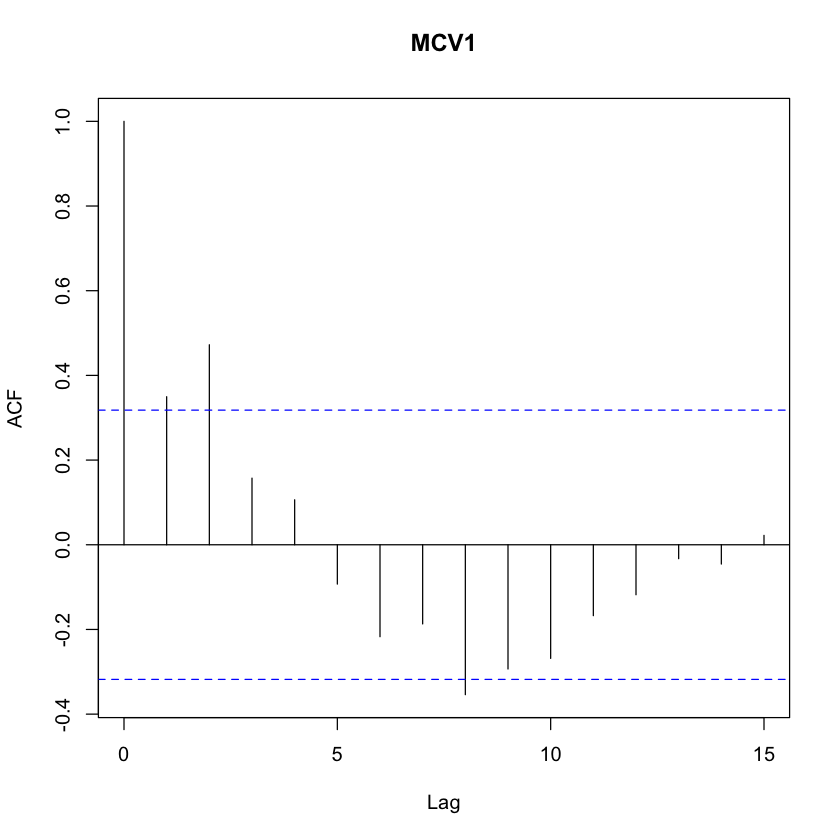

In [168]:
library(tseries)
for (col in colnames(usVaccines)) {
    acf(usVaccines[, col], main=col)
}

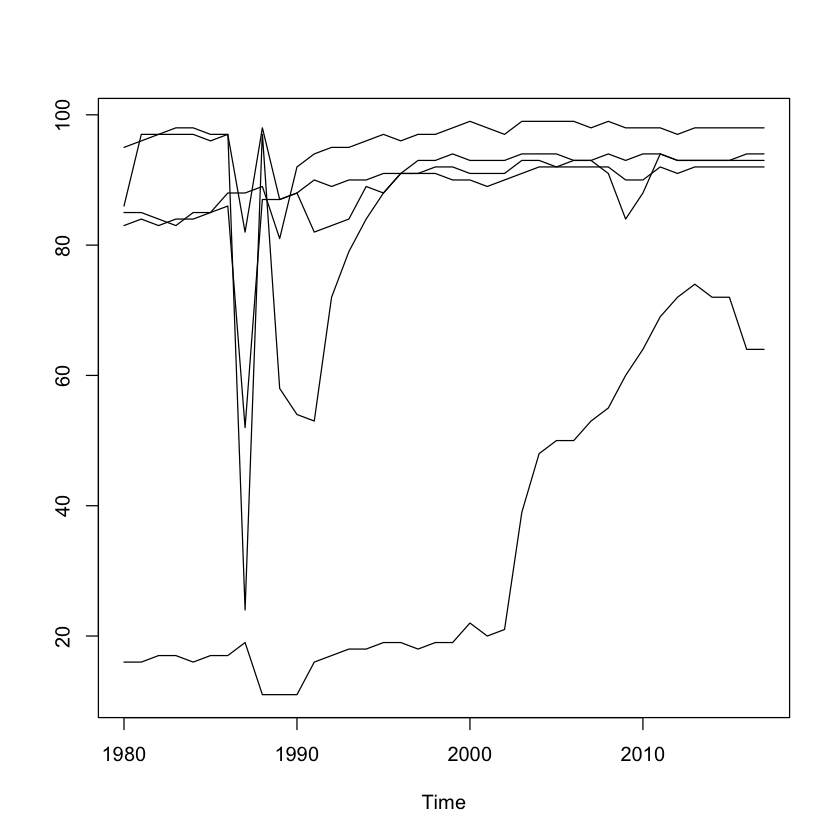

In [7]:
ts.plot(usVaccines)

In [8]:
summary(usVaccines)

      DTP1          HepB_BD           Pol3            Hib3      
 Min.   :81.00   Min.   :11.00   Min.   :24.00   Min.   :52.00  
 1st Qu.:89.75   1st Qu.:17.00   1st Qu.:90.00   1st Qu.:87.00  
 Median :97.00   Median :19.00   Median :93.00   Median :91.00  
 Mean   :94.05   Mean   :34.21   Mean   :87.16   Mean   :89.21  
 3rd Qu.:98.00   3rd Qu.:54.50   3rd Qu.:94.00   3rd Qu.:93.00  
 Max.   :99.00   Max.   :74.00   Max.   :97.00   Max.   :94.00  
      MCV1      
 Min.   :82.00  
 1st Qu.:90.00  
 Median :92.00  
 Mean   :91.24  
 3rd Qu.:92.00  
 Max.   :98.00  

      DTP1            HepB_BD            Pol3                Hib3         
 Min.   :-8.0000   Min.   :-8.000   Min.   :-73.00000   Min.   :-34.0000  
 1st Qu.: 0.0000   1st Qu.: 0.000   1st Qu.:  0.00000   1st Qu.:  0.0000  
 Median : 0.0000   Median : 1.000   Median :  0.00000   Median :  0.0000  
 Mean   : 0.4054   Mean   : 1.297   Mean   : -0.02703   Mean   :  0.2162  
 3rd Qu.: 1.0000   3rd Qu.: 2.000   3rd Qu.:  1.00000   3rd Qu.:  1.0000  
 Max.   :11.0000   Max.   :18.000   Max.   : 73.00000   Max.   : 35.0000  
      MCV1         
 Min.   :-15.0000  
 1st Qu.:  0.0000  
 Median :  0.0000  
 Mean   :  0.1622  
 3rd Qu.:  1.0000  
 Max.   : 16.0000  

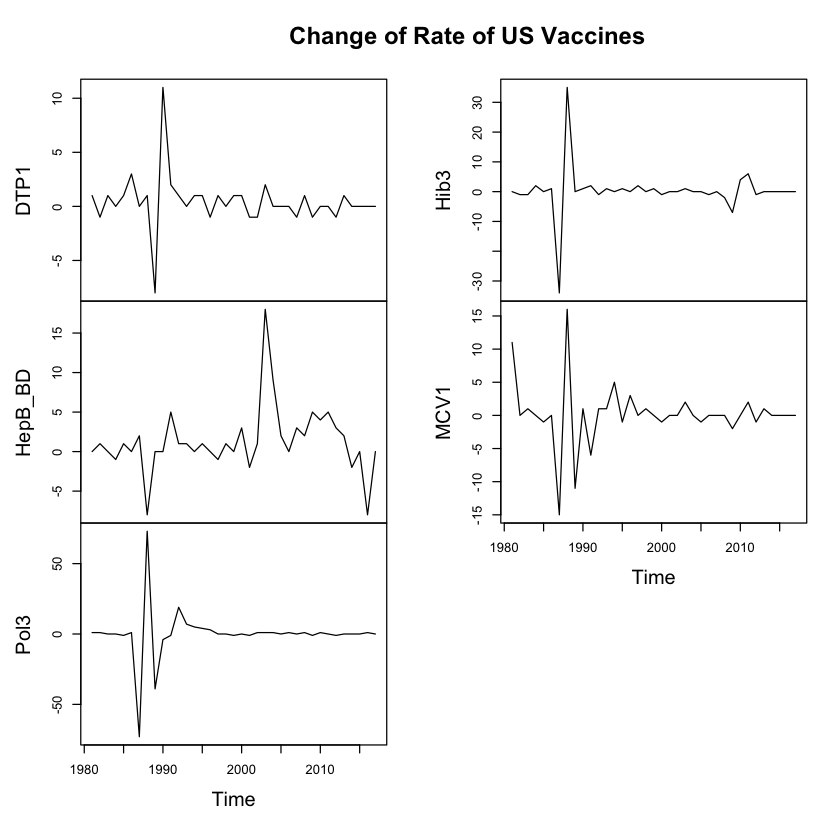

In [181]:
plot(diff(usVaccines), main='Change of Rate of US Vaccines')
summary(diff(usVaccines))

### Solution
* How have U.S. vaccination rates varied over time? 
* Are vaccination rates increasing or decreasing? 
* Which vaccination has the highest rate at the conclusion of the time series? 
* Which vaccination has the lowest rate at the conclusion of the time series? 
* Which vaccine has the greatest volatility?

## Question 2
2.	What proportion of public schools reported vaccination data? What proportion of private schools reported vaccination data? Was there any credible difference in overall reporting proportions between public and private schools?

In [10]:
head(allSchoolsReportStatus, 2)
ct_sch_vax = table(allSchoolsReportStatus[, c("pubpriv", "reported")])
ct_sch_vax_mar = addmargins(ct_sch_vax)
ct_sch_vax_perc = 100*ct_sch_vax/ct_sch_vax_mar[c('PRIVATE', 'PUBLIC'), 'Sum']
ct_sch_vax
ct_sch_vax_mar
ct_sch_vax_perc

,name,pubpriv,reported
,<chr>,<chr>,<chr>
1,AGUA DULCE ELEMENTARY,PUBLIC,Y
2,MEADOWLARK ELEMENTARY,PUBLIC,Y


         reported
pubpriv      N    Y
  PRIVATE  252 1397
  PUBLIC   148 5584

,N,Y,Sum
PRIVATE,252,1397,1649
PUBLIC,148,5584,5732
Sum,400,6981,7381


         reported
pubpriv           N         Y
  PRIVATE 15.281989 84.718011
  PUBLIC   2.581996 97.418004

In [11]:
# Chi-Squared Test for a Categorical Association
sch_vax_Xsq <- chisq.test(ct_sch_vax)
sch_vax_Xsq
sch_vax_exp <- addmargins(sch_vax_Xsq$expect)
print("Expected Value Table")
print(sch_vax_exp)


	Pearson's Chi-squared test with Yates' continuity correction

data:  ct_sch_vax
X-squared = 400.49, df = 1, p-value < 2.2e-16


[1] "Expected Value Table"
         reported
pubpriv           N        Y  Sum
  PRIVATE  89.36458 1559.635 1649
  PUBLIC  310.63542 5421.365 5732
  Sum     400.00000 6981.000 7381


In [12]:
# Anova Contingency Table BF
ctBFout <- contingencyTableBF(ct_sch_vax,sampleType="poisson", posterior=FALSE)
print(ctBFout)
sch_vax_ctMCMCout <- contingencyTableBF(ct_sch_vax,sampleType="poisson", posterior=TRUE,iterations=10000)
print(summary(sch_vax_ctMCMCout))

Bayes factor analysis
--------------
[1] Non-indep. (a=1) : 1.150548e+69 ±0%

Against denominator:
  Null, independence, a = 1 
---
Bayes factor type: BFcontingencyTable, poisson


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean    SD Naive SE Time-series SE
lambda[1,1]  252.7 15.67   0.1567         0.1567
lambda[2,1]  149.2 12.27   0.1227         0.1227
lambda[1,2] 1396.9 37.24   0.3724         0.3652
lambda[2,2] 5582.5 75.69   0.7569         0.7569

2. Quantiles for each variable:

              2.5%    25%    50%    75%  97.5%
lambda[1,1]  222.7  242.0  252.2  263.0  284.4
lambda[2,1]  126.0  140.8  148.8  157.3  174.6
lambda[1,2] 1325.4 1371.6 1396.1 1421.8 1471.4
lambda[2,2] 5435.5 5532.0 5582.2 5632.7 5733.1



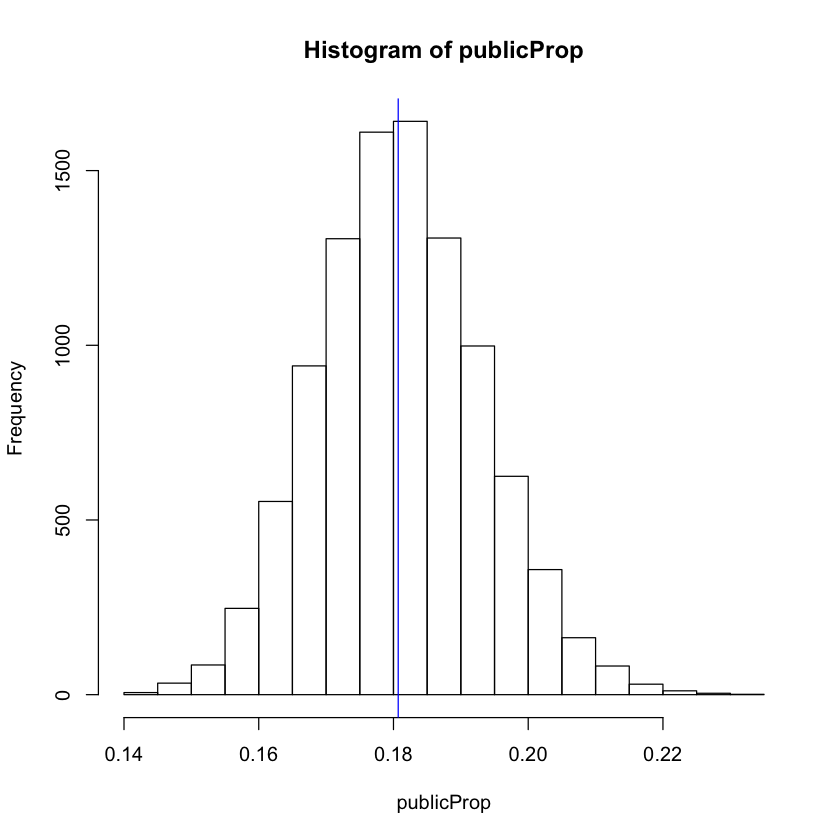

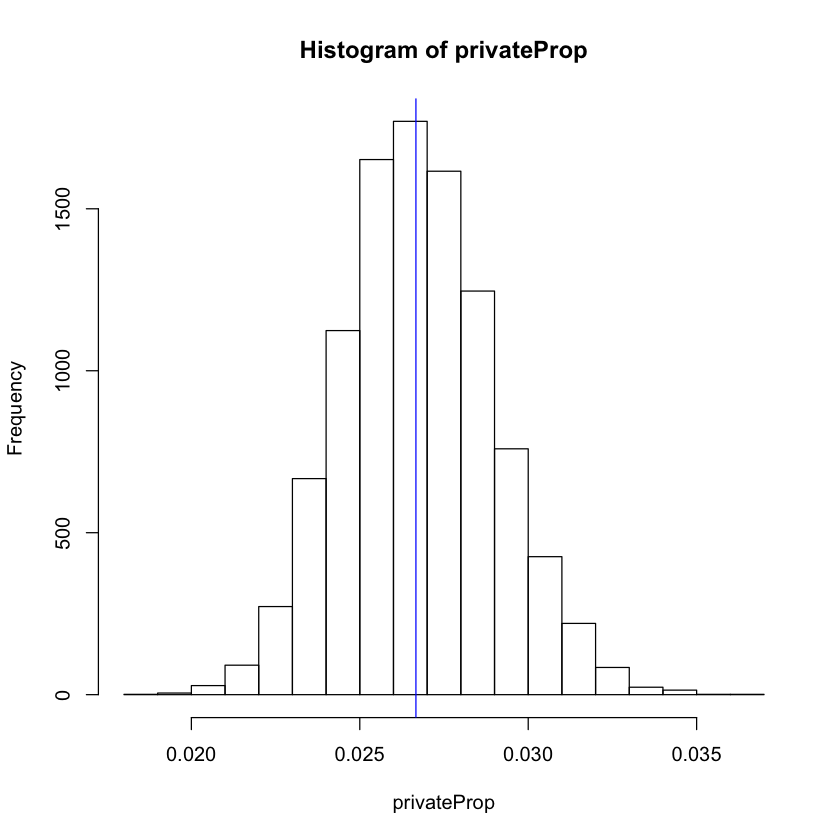

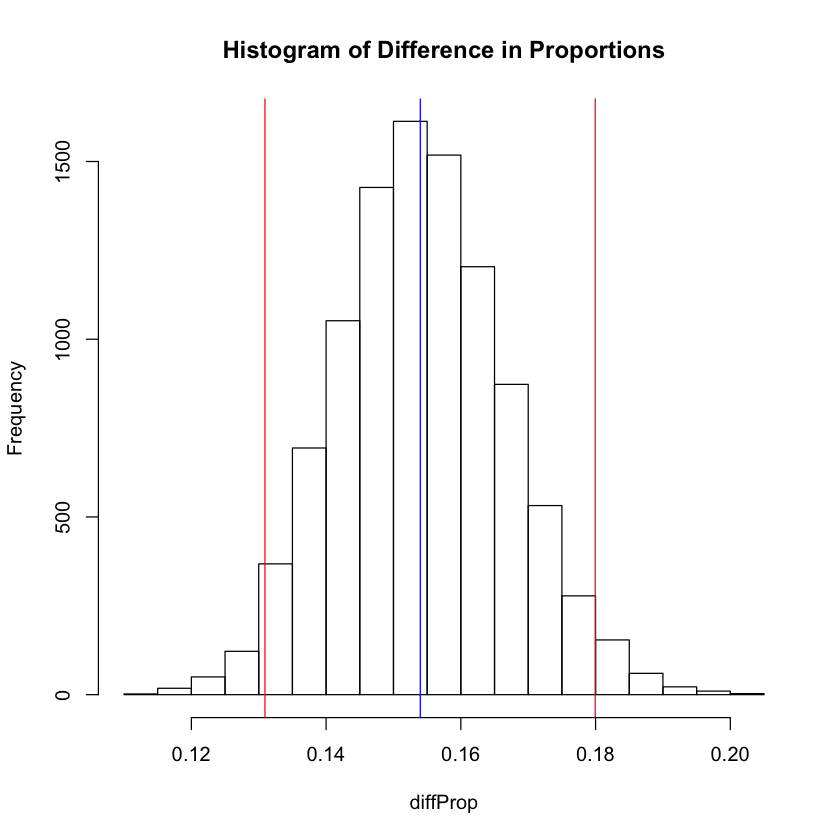

In [183]:
# BF Contingency Table Posterior Results
publicProp <- sch_vax_ctMCMCout[,"lambda[1,1]"]/sch_vax_ctMCMCout[,"lambda[1,2]"]
hist(publicProp)
abline(v=unname(quantile(publicProp, .5)), col='blue')

privateProp <- sch_vax_ctMCMCout[,"lambda[2,1]"]/sch_vax_ctMCMCout[,"lambda[2,2]"]
hist(privateProp)
abline(v=unname(quantile(privateProp, .5)), col='blue')

diffProp <- publicProp-privateProp
hist(diffProp, main='Histogram of Difference in Proportions')
abline(v=unname(quantile(diffProp, .5)), col='blue')
abline(v=unname(quantile(diffProp, .025)), col='red')
abline(v=unname(quantile(diffProp, .975)), col='red')

### Solution
* What proportion of public schools reported vaccination data? 
> 5584/5732 ~ 97.4%
* What proportion of private schools reported vaccination data? 
> 1397/1649 ~ 84.7%
* Was there any credible difference in overall reporting proportions between public and private schools?
> To check for a difference in Public and Private school vaccination reporting rate, we ran a Chi-Squared Test for a Categorical Association, and its Bayesian equivalent using a Bayes Factor package. In both tests, we found significant evidence to say the proportions of reporting rates are different with the Public Schools reporting rate being higher than Private Schools. The Bayesian Posterior analysis showed the difference in proportions to always be positive in the resulting HDI which means Public Schools are more likely to report vaccination records. Similarly, the Baysian Factor resulted in a value too big to write down which means there is a difference between the two school types. Finally, the frequestist test of chi-squared resulted in a p-value less than 0.05 which means we reject the null of the school types having the same proportions.

## Question 3
3.	What are 2013 vaccination rates for individual vaccines (i.e., DOT, Polio, MMR, and HepB) in California public schools?  How do these rates for individual vaccines in California districts compare with overall US vaccination rates (make an informal comparison to the final observations in the time series)?

#### Overall Calculations

In [14]:
districts$WithDTP <- districts$Enrolled - districts$WithoutDTP*(districts$Enrolled/100)
districts$WithPolio <- districts$Enrolled - districts$WithoutPolio*(districts$Enrolled/100)
districts$WithMMR <- districts$Enrolled - districts$WithoutMMR*(districts$Enrolled/100)
districts$WithHepB <- districts$Enrolled - districts$WithoutHepB*(districts$Enrolled/100)

In [15]:
sum_dist <- colSums(districts[, c('WithDTP', 'WithPolio','WithMMR', 'WithHepB', 'Enrolled')])
sum_dist
sum_dist <- 100*sum_dist[c('WithDTP', 'WithPolio','WithMMR', 'WithHepB')]/sum_dist['Enrolled']
sum_dist

WithDTP WithPolio   WithMMR  WithHepB  Enrolled 
 406939.7  409143.9  408080.4  417981.2  439276.0

WithDTP WithPolio   WithMMR  WithHepB 
 92.63873  93.14050  92.89840  95.15229

#### Distribution Calculations

In [16]:
districts$WithDTPPerc <- 100*districts$WithDTP/districts$Enrolled
districts$WithPolioPerc <- 100*districts$WithPolio/districts$Enrolled
districts$WithMMRPerc <- 100*districts$WithMMR/districts$Enrolled
districts$WithHepBPerc <- 100*districts$WithHepB/districts$Enrolled

In [17]:
summary(districts[, c('WithDTPPerc', 'WithPolioPerc','WithMMRPerc', 'WithHepBPerc')])

  WithDTPPerc     WithPolioPerc     WithMMRPerc     WithHepBPerc  
 Min.   : 23.00   Min.   : 23.00   Min.   : 23.0   Min.   : 23.0  
 1st Qu.: 86.00   1st Qu.: 87.00   1st Qu.: 86.0   1st Qu.: 90.0  
 Median : 93.00   Median : 94.00   Median : 94.0   Median : 96.0  
 Mean   : 89.75   Mean   : 90.16   Mean   : 89.8   Mean   : 92.2  
 3rd Qu.: 97.00   3rd Qu.: 97.00   3rd Qu.: 97.0   3rd Qu.: 98.0  
 Max.   :100.00   Max.   :100.00   Max.   :100.0   Max.   :100.0  

In [209]:
last_vax_rec = c(tail(usVaccines, 1)[, c('DTP1', 'Pol3', 'MCV1', 'HepB_BD')])
last_vax_rec

DTP1    Pol3    MCV1 HepB_BD 
     98      94      92      64

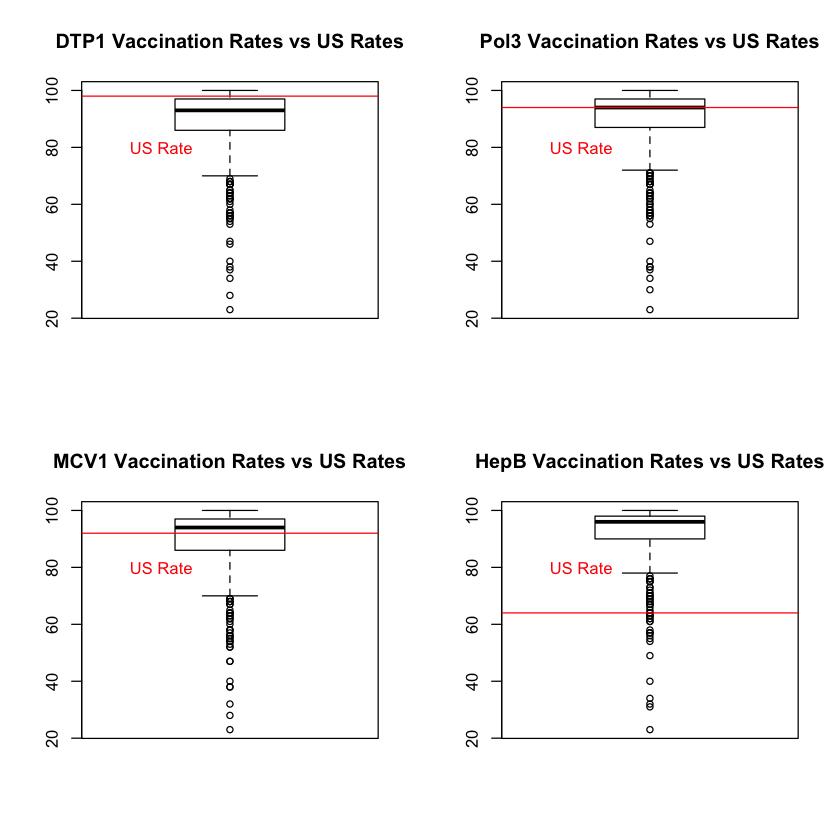

In [208]:
par(mfrow = c(2,2))
boxplot(districts[, 'WithDTPPerc'], main='DTP1 Vaccination Rates vs US Rates')
abline(h=last_vax_rec['DTP1'], col="red")
text(.75,80, "US Rate", col="red")

boxplot(districts[, 'WithPolioPerc'], main='Pol3 Vaccination Rates vs US Rates')
abline(h=last_vax_rec['Pol3'], col="red")
text(.75,80, "US Rate", col="red")

boxplot(districts[, 'WithMMRPerc'], main='MCV1 Vaccination Rates vs US Rates')
abline(h=last_vax_rec['MCV1'], col="red")
text(.75,80, "US Rate", col="red")

boxplot(districts[, 'WithHepBPerc'], main='HepB Vaccination Rates vs US Rates')
abline(h=last_vax_rec['HepB_BD'], col="red")
text(.75,80, "US Rate", col="red")


In [214]:
ttest_res$estimate
ttest_res$p.value
ttest_res$conf[1]
ttest_res$conf[2]

mean of x 
    89.75

DTP1 
7.192623e-69

[1] 88.92638

[1] 90.57362

In [218]:
seq(1, length(last_vax_rec))

[1] 1 2 3 4

In [238]:
last_vax_rec = c(tail(usVaccines, 1)[, c('DTP1', 'Pol3', 'MCV1', 'HepB_BD')])
distric_vax_cols = c('WithDTPPerc','WithPolioPerc','WithMMRPerc','WithHepBPerc')
vax_L = c('DTP1', 'Pol3', 'MCV1', 'HepB_BD')
ttest_resL = list()

for (i in seq(1, length(last_vax_rec))) {
    ttest_res = t.test(districts[, distric_vax_cols[i]], mu=last_vax_rec[i])
    
    ttest_res <- data.frame(vax = vax_L[i], 
                          mean = ttest_res$estimate,
                          p_val = ttest_res$p.value,
                          conf_int_lower = ttest_res$conf[1],
                          conf_int_upper = ttest_res$conf[2],
                          national_rate = last_vax_rec[i]
                         )  
    ttest_resL[[i]] <- ttest_res # add it to your list
}

ttest_res <- do.call(rbind, ttest_resL)
ttest_res

,vax,mean,p_val,conf_int_lower,conf_int_upper,national_rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mean of x,DTP1,89.75000,7.192623e-69,88.92638,90.57362,98
mean of x1,Pol3,90.16429,5.245779e-19,89.34296,90.98561,94
mean of x2,MCV1,89.79714,4.113745e-07,88.95114,90.64315,92
mean of x3,HepB_BD,92.20143,0.000000e+00,91.46007,92.94279,64


In [244]:
library("BEST")

last_vax_rec = c(tail(usVaccines, 1)[, c('DTP1', 'Pol3', 'MCV1', 'HepB_BD')])
distric_vax_cols = c('WithDTPPerc','WithPolioPerc','WithMMRPerc','WithHepBPerc')
vax_L = c('DTP1', 'Pol3', 'MCV1', 'HepB_BD')

ttest_bf_resL = list()

for (i in seq(1, length(last_vax_rec))) {

    ttest_bf_res = summary(BESTmcmc(districts[, distric_vax_cols[i]], last_vax_rec[i]))['mu1', ]
    
    ttest_bf_res <- data.frame(vax = vax_L[i], 
                          conf_int_lower = ttest_bf_res['HDIlo'],
                          median = ttest_bf_res['median'],
                          conf_int_upper = ttest_bf_res['HDIup'],
                          mean = ttest_bf_res['mean'],
                          national_rate = last_vax_rec[i]
                         )  
    ttest_bf_resL[[i]] <- ttest_bf_res # add it to your list
}

ttest_bf_res <- do.call(rbind, ttest_bf_resL)
ttest_bf_res

Waiting for parallel processing to complete...
done.

Waiting for parallel processing to complete...
done.

Waiting for parallel processing to complete...
done.

Waiting for parallel processing to complete...
done.



,vax,conf_int_lower,median,conf_int_upper,mean,national_rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HDIlo,DTP1,92.99018,93.62116,94.19976,93.61627,98
HDIlo1,Pol3,93.55201,94.13346,94.70487,94.13019,94
HDIlo2,MCV1,93.44835,94.04691,94.63047,94.03974,92
HDIlo3,HepB_BD,95.58904,96.00747,96.41360,96.00305,64


## Question 4
4.	Among districts, how are the vaccination rates for individual vaccines related? In other words, if students are missing one vaccine are they missing all of the others?
- Correlation between numbers missing
- Check how many schools have equal vax missing in all vaxes

In [247]:
# Check if Percentage is the same for All
districts$PctNotUpToDate <- 100 - districts$PctUpToDate

districts$WithoutAll <- ifelse(((districts$WithoutDTP==districts$WithoutPolio)
                                & (districts$WithoutDTP==districts$WithoutMMR)
                                & (districts$WithoutDTP==districts$WithoutHepB)
                                & (districts$WithoutDTP==districts$PctNotUpToDate)),"Yes","No")

districts$AllVax <- ifelse((districts$PctUpToDate==100),"Yes","No")
table(districts[, c('WithoutAll', 'AllVax')])

# If not all individuals are vaccinated, then 161/(496+161) ~ 24.5% of schools have none of them

          AllVax
WithoutAll  No Yes
       No  535   0
       Yes 122  43

##### Correlation Analysis Frequentist

In [132]:
# Correlation Analysis Frequentist
sc_inperf = districts[districts$PctUpToDate!=100, ] # Get inperfect schools (drop 43 schools with perfect vax record)

sc_inperf$Without <- 100-sc_inperf$PctUpToDate
round(cor(sc_inperf[, c('WithoutDTP', 'WithoutPolio','WithoutMMR', 'WithoutHepB', 'Without')]), 2)

# Perform Corr Test for each Combination
without_cols <- c('WithoutDTP', 'WithoutPolio','WithoutMMR', 'WithoutHepB', 'Without')

cor_resL = list()
count <- 1
for (x in seq(1,length(without_cols)-1)) {

    for (y in seq(x+1,length(without_cols))){
        
        
        cor_res <- cor.test(sc_inperf[, without_cols[x]], sc_inperf[, without_cols[y]]) # Execute Res
        cor_res <- data.frame(x = without_cols[x], 
                              y = without_cols[y],
                              cor = cor_res$estimate,
                              p_val = cor_res$p.value,
                              conf_int_lower = cor_res$conf[1],
                              conf_int_upper = cor_res$conf[2],
                              num_diff = nrow(sc_inperf[sc_inperf[,without_cols[x]] != sc_inperf[, without_cols[y]], ]),
                              total = nrow(sc_inperf),
                              avg_diff = mean(abs(sc_inperf[,without_cols[x]] - sc_inperf[, without_cols[y]]))
                             )
        cor_resL[[count]] <- cor_res # add it to your list
        
        count <- count + 1
    }
}

cor.test(sc_inperf[, 'WithoutDTP'], sc_inperf[, 'WithoutHepB'])

cor_res = do.call(rbind, cor_resL)
cor_res

,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,Without
WithoutDTP,1.00,0.98,0.98,0.89,0.96
WithoutPolio,0.98,1.00,0.97,0.90,0.94
WithoutMMR,0.98,0.97,1.00,0.89,0.97
WithoutHepB,0.89,0.90,0.89,1.00,0.84
Without,0.96,0.94,0.97,0.84,1.00



	Pearson's product-moment correlation

data:  sc_inperf[, "WithoutDTP"] and sc_inperf[, "WithoutHepB"]
t = 50.007, df = 655, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8731533 0.9050544
sample estimates:
      cor 
0.8901899 


,x,y,cor,p_val,conf_int_lower,conf_int_upper,num_diff,total,avg_diff
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
cor,WithoutDTP,WithoutPolio,0.9814509,0.000000e+00,0.9784114,0.9840659,251,657,0.8736682
cor1,WithoutDTP,WithoutMMR,0.9814299,0.000000e+00,0.9783870,0.9840479,283,657,1.0334855
cor2,WithoutDTP,WithoutHepB,0.8901899,8.125305e-226,0.8731533,0.9050544,448,657,2.9649924
cor3,WithoutDTP,Without,0.9600451,0.000000e+00,0.9535801,0.9656256,422,657,2.0319635
cor4,WithoutPolio,WithoutMMR,0.9726613,0.000000e+00,0.9682046,0.9765008,296,657,1.1796043
cor5,WithoutPolio,WithoutHepB,0.9043900,1.870970e-244,0.8894275,0.9174162,403,657,2.5905632
cor6,WithoutPolio,Without,0.9423949,1.001752e-313,0.9331713,0.9503782,456,657,2.4733638
cor7,WithoutMMR,WithoutHepB,0.8938302,2.436573e-230,0.8773216,0.9082258,423,657,2.8751903
cor8,WithoutMMR,Without,0.9656428,0.000000e+00,0.9600651,0.9704532,440,657,2.0821918


##### Correlation Analysis Bayes Factor

In [160]:
cor_post_res[]$quantiles['97.5%']

97.5% 
0.8823532

In [163]:
# Correlation Analysis Bayes Factor
bfCorTest <- function (x,y) # Get r from BayesFactor
{
    zx <- scale(x) # Standardize X
    zy <- scale(y) # Standardize Y
    zData <- data.frame(x=zx,rhoNot0=zy) # Put in a data frame
    bfOut <- generalTestBF(x ~ rhoNot0, data=zData) # linear coefficient
    mcmcOut <- posterior(bfOut,iterations=10000) # posterior samples
#     print(summary(mcmcOut[,"rhoNot0"])) # Get the HDI for rho
#     plot(mcmcOut)
    return(bfOut) # Return Bayes factor object
}
postCorTest <- function (x,y) # Get r from BayesFactor
{
    zx <- scale(x) # Standardize X
    zy <- scale(y) # Standardize Y
    zData <- data.frame(x=zx,rhoNot0=zy) # Put in a data frame
    bfOut <- generalTestBF(x ~ rhoNot0, data=zData) # linear coefficient
    mcmcOut <- posterior(bfOut,iterations=10000) # posterior samples
#     print(summary(mcmcOut[,"rhoNot0"])) # Get the HDI for rho
#     plot(mcmcOut)
    return(mcmcOut) # Return Bayes factor object
}


cor_bf_resL = list()
count <- 1
for (x in seq(1,length(without_cols)-1)) {
    for (y in seq(x+1,length(without_cols))) {
        cor_bf_res <- bfCorTest(sc_inperf[, without_cols[x]], sc_inperf[, without_cols[y]]) # Execute Res
        cor_post_res <- summary(postCorTest(sc_inperf[, without_cols[x]], sc_inperf[, without_cols[y]])[, "rhoNot0"]) # Execute Res

        cor_bf_res <- data.frame(x = without_cols[x], 
                              y = without_cols[y],
                              bf = extractBF(cor_bf_res)$bf,
                              conf_int_lower = cor_post_res$quantiles['2.5%'],
                              median = cor_post_res$quantiles['50%'],
                              conf_int_upper = cor_post_res$quantiles['97.5%'],
                              mean = cor_post_res$statistics['Mean'],
                              sd = cor_post_res$statistics['SD']
                             )
        cor_bf_resL[[count]] <- cor_bf_res # add it to your list

        count <- count + 1
    }
}

cor_bf_res = do.call(rbind, cor_bf_resL)
cor_bf_res

,x,y,bf,conf_int_lower,median,conf_int_upper,mean,sd
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.5%,WithoutDTP,WithoutPolio,Inf,0.9661810,0.9812760,0.9961160,0.9812458,0.007562902
2.5%1,WithoutDTP,WithoutMMR,Inf,0.9667598,0.9812939,0.9957762,0.9812784,0.007416584
2.5%2,WithoutDTP,WithoutHepB,2.653119e+221,0.8544770,0.8897247,0.9243606,0.8896819,0.017808684
2.5%3,WithoutDTP,Without,Inf,0.9385259,0.9599735,0.9817711,0.9599960,0.010895297
2.5%4,WithoutPolio,WithoutMMR,Inf,0.9547910,0.9726297,0.9904393,0.9726626,0.009124597
2.5%5,WithoutPolio,WithoutHepB,1.033976e+240,0.8716391,0.9038877,0.9367270,0.9040408,0.016547684
2.5%6,WithoutPolio,Without,Inf,0.9158948,0.9418794,0.9680240,0.9419542,0.013174148
2.5%7,WithoutMMR,WithoutHepB,8.612511e+225,0.8590916,0.8934828,0.9281075,0.8934101,0.017468101
2.5%8,WithoutMMR,Without,Inf,0.9449771,0.9651849,0.9849702,0.9651707,0.010142454


### Solution
Extremly high correlation with DTP, Polio and MMR when at least one individual does not have all vaccines. On the other hand, not having HepB is less correlated to the rest of the vaccines. 

# Predictive Analysis
(For all of these analyses, use PctChildPoverty, PctFreeMeal, PctFamilyPoverty, Enrolled,  and TotalSchools as predictors. Transform variables as necessary to improve prediction and/or interpretability. In general, if there is a Bayesian version of an analysis available, you are expected to run that analysis in addition to the frequentist version of the analysis.)

In [24]:
logistic <- function(logistX)
{
  exp(logistX)/(exp(logistX)+1)
}

In [25]:
pred_cols <- c('PctChildPoverty', 'PctFreeMeal', 'PctFamilyPoverty', 'Enrolled',  'TotalSchools')

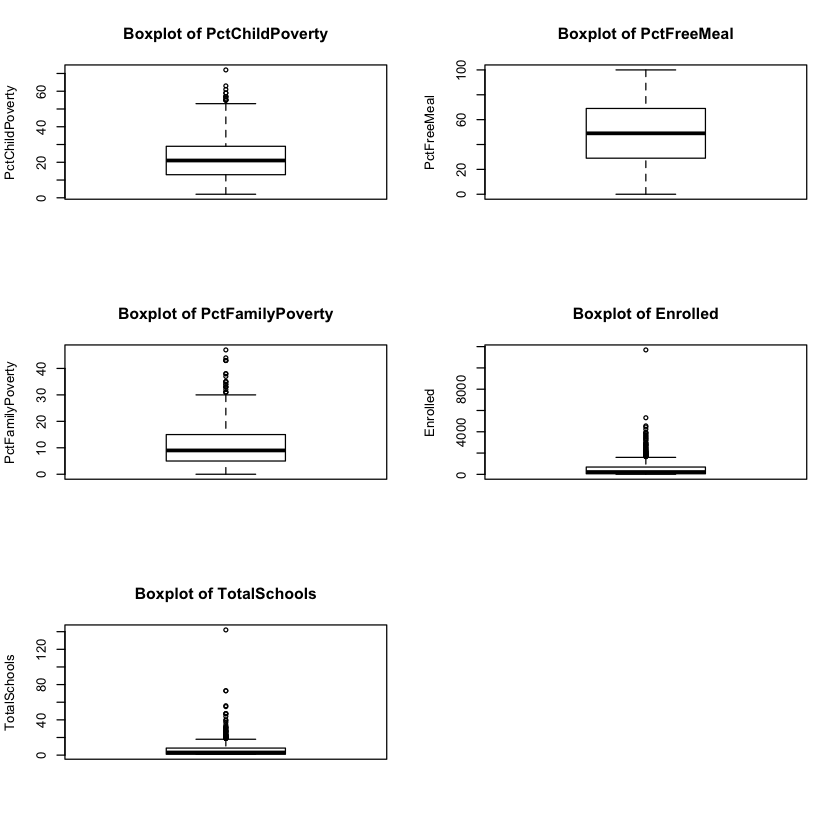

In [288]:
par(mfrow = c(3,2))
for (i in seq(1, length(pred_cols))) {
    boxplot(districts[, pred_cols[i]], main=paste('Boxplot of', pred_cols[i]), ylab=pred_cols[i])
}

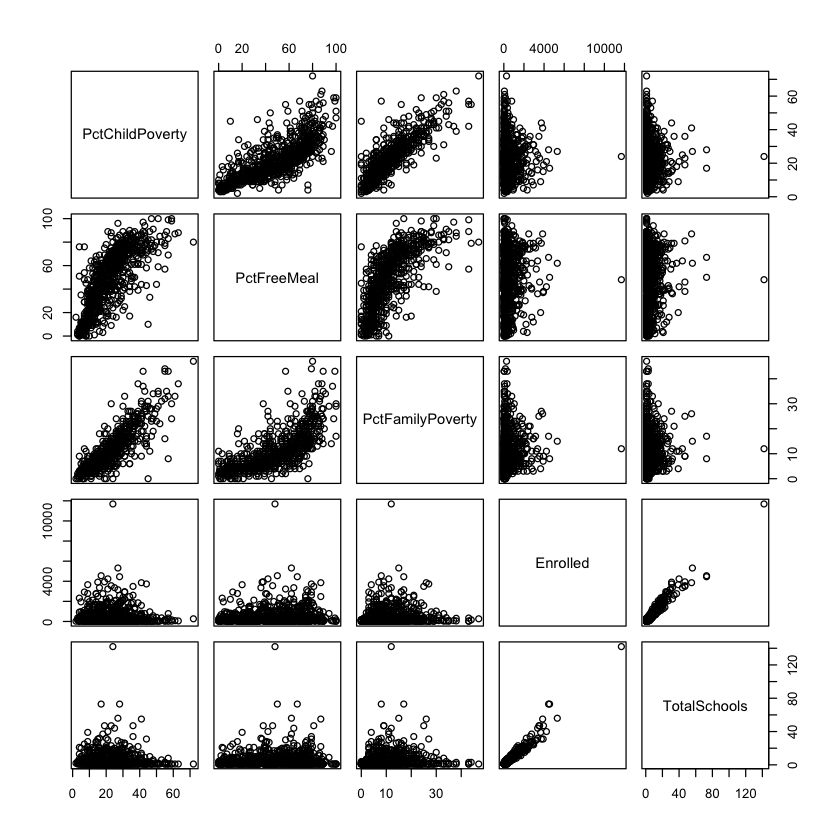

In [285]:
pairs(districts[, pred_cols])

In [284]:
districts <- districts[districts[, 'TotalSchools']<200, ]

## Question 5
5.	What variables predict whether or not a district’s reporting was complete?

In [385]:
pred_col <- 'DistrictComplete'
pred_col_factor <- paste(pred_col,'Factor', sep="")
pred_col_num <- paste(pred_col,'Num', sep="")

districts[, pred_col_factor] <- factor(districts$DistrictComplete, labels=c(0, 1))
districts[, pred_col_num] <- as.numeric(districts$DistrictCompleteFactor) - 1

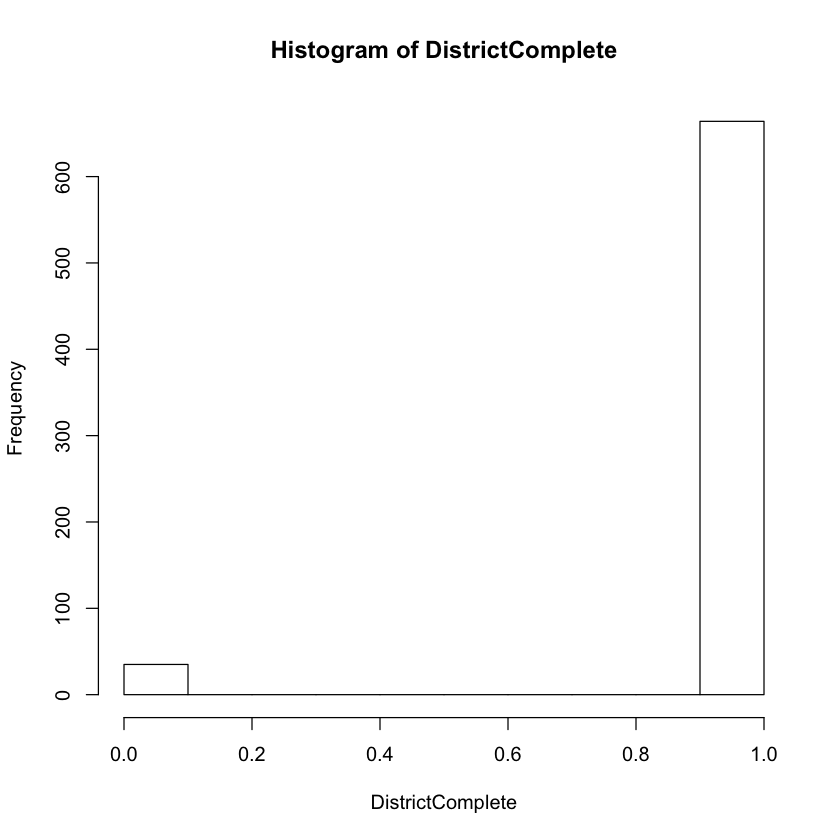

In [389]:
hist(districts[, pred_col_num], main=paste('Histogram of', pred_col), xlab=pred_col)

,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools
PctChildPoverty,1.00000000,0.75187546,0.85101699,-0.01439864,-0.02409280
PctFreeMeal,0.75187546,1.00000000,0.71644320,0.08390907,0.06661373
PctFamilyPoverty,0.85101699,0.71644320,1.00000000,0.04084347,0.02580181
Enrolled,-0.01439864,0.08390907,0.04084347,1.00000000,0.97015737
TotalSchools,-0.02409280,0.06661373,0.02580181,0.97015737,1.00000000


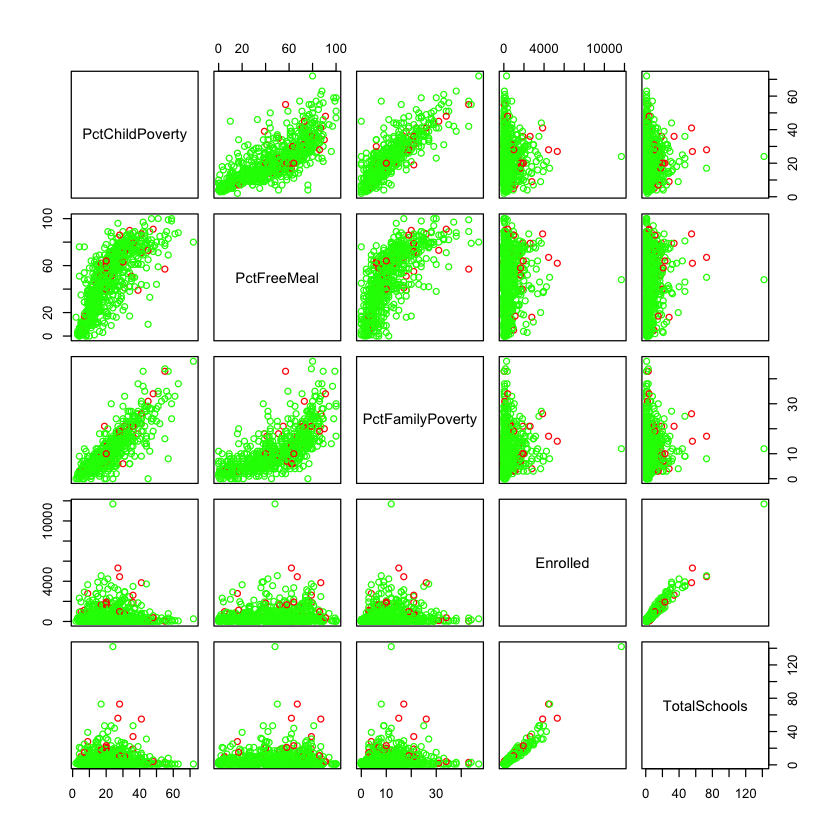

In [289]:
cols <- character(nrow(districts))
cols[] <- "black"
cols[districts[, pred_col] == TRUE] <- "green"
cols[districts[, pred_col] == FALSE] <- "red"

pairs(districts[, pred_cols], col=cols)
cor(districts[, pred_cols])

In [291]:
by(districts[,append(pred_cols, c(pred_col))], districts[, pred_col], function(x) {cor(x[, 1:5])})

districts[, pred_col]: FALSE
                 PctChildPoverty PctFreeMeal PctFamilyPoverty    Enrolled
PctChildPoverty       1.00000000   0.6759884       0.91604384 -0.02693970
PctFreeMeal           0.67598839   1.0000000       0.61812122  0.11740847
PctFamilyPoverty      0.91604384   0.6181212       1.00000000 -0.01836814
Enrolled             -0.02693970   0.1174085      -0.01836814  1.00000000
TotalSchools          0.02228511   0.1599768       0.02235951  0.96742752
                 TotalSchools
PctChildPoverty    0.02228511
PctFreeMeal        0.15997678
PctFamilyPoverty   0.02235951
Enrolled           0.96742752
TotalSchools       1.00000000
------------------------------------------------------------ 
districts[, pred_col]: TRUE
                 PctChildPoverty PctFreeMeal PctFamilyPoverty    Enrolled
PctChildPoverty       1.00000000  0.75424911      0.846855557 -0.02448142
PctFreeMeal           0.75424911  1.00000000      0.720910428  0.07096035
PctFamilyPoverty      0.84685556  0

#### GSL with Logistic Regression

##### Linear Regression for Collinearity Frequentist

In [327]:
formula_str = paste(pred_col_factor, ' ~ PctChildPoverty + PctFreeMeal + PctFamilyPoverty + Enrolled + TotalSchools')
glmOut <- glm(formula_str, data=districts, family=binomial())
summary(glmOut)
exp(confint(glmOut))
anova(glmOut, test="Chisq") # Compare null model to one predictor
round(coef(glmOut), 2)# Convert log odds to odds (Intercept) logistX
round(exp(coef(glmOut)), 2)# Convert log odds to odds (Intercept) logistX


Call:
glm(formula = formula_str, family = binomial(), data = districts)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7711   0.2298   0.2707   0.3250   1.8375  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       3.9566197  0.5016414   7.887 3.09e-15 ***
PctChildPoverty   0.0248614  0.0316583   0.785  0.43228    
PctFreeMeal      -0.0111337  0.0118946  -0.936  0.34926    
PctFamilyPoverty -0.0596358  0.0396739  -1.503  0.13280    
Enrolled          0.0018163  0.0008216   2.211  0.02706 *  
TotalSchools     -0.1794111  0.0655295  -2.738  0.00618 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 277.82  on 698  degrees of freedom
Residual deviance: 252.18  on 693  degrees of freedom
AIC: 264.18

Number of Fisher Scoring iterations: 6


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),20.9430950,151.3195305
PctChildPoverty,0.9659396,1.0930889
PctFreeMeal,0.9656662,1.0119119
PctFamilyPoverty,0.8720020,1.0191471
Enrolled,1.0003902,1.0036610
TotalSchools,0.7209873,0.9361211


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,698,277.8187,NA
PctChildPoverty,1,3.241521,697,274.5772,0.071793976
PctFreeMeal,1,1.995714,696,272.5814,0.157744748
PctFamilyPoverty,1,2.288687,695,270.2928,0.130320157
Enrolled,1,7.406391,694,262.8864,0.006499257
TotalSchools,1,10.701974,693,252.1844,0.001070213


(Intercept)  PctChildPoverty      PctFreeMeal PctFamilyPoverty 
            3.96             0.02            -0.01            -0.06 
        Enrolled     TotalSchools 
            0.00            -0.18

(Intercept)  PctChildPoverty      PctFreeMeal PctFamilyPoverty 
           52.28             1.03             0.99             0.94 
        Enrolled     TotalSchools 
            1.00             0.84

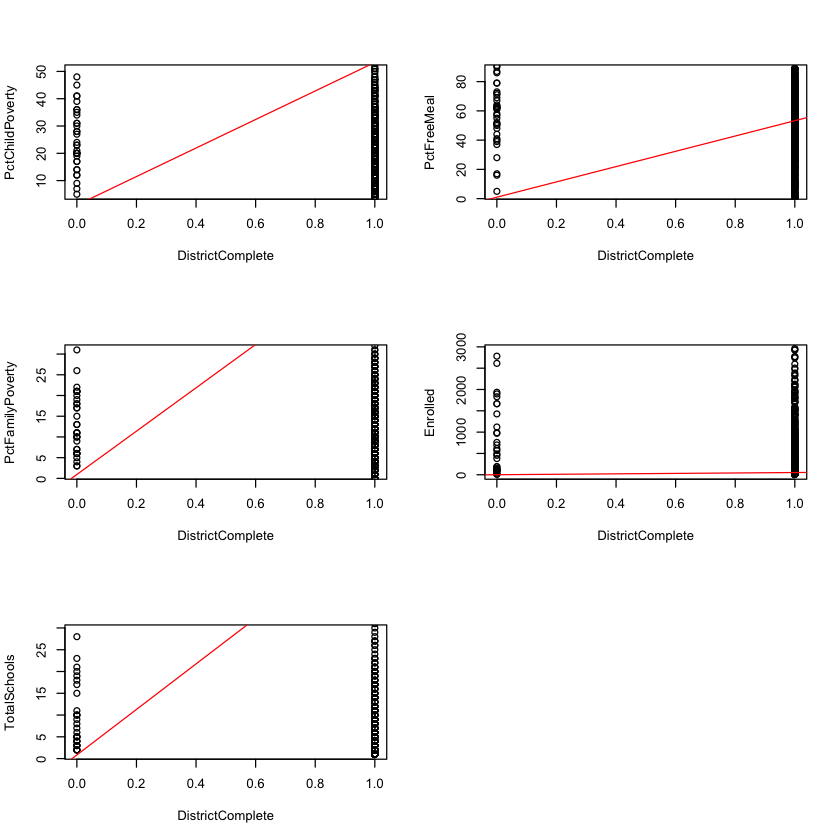

In [328]:
par(mfrow = c(3,2))
for (x in pred_cols){
    plot(districts[, pred_col], districts[, x], 
         ylab=x, xlab=pred_col, 
         ylim=c(quantile(districts[, x], .025), quantile(districts[, x], .975)))
    abline(a=exp(coef(glmOut))[x], b=exp(coef(glmOut))['(Intercept)'], col = "red")
}

In [329]:
districts[, 'Enrolled100'] <- districts[, 'Enrolled']/100

formula_str = paste(pred_col_factor, ' ~ PctChildPoverty + PctFreeMeal + PctFamilyPoverty + Enrolled100 + TotalSchools')
glmOut <- glm(formula_str, data=districts, family=binomial())
summary(glmOut)
exp(confint(glmOut))
anova(glmOut, test="Chisq") # Compare null model to one predictor
round(exp(coef(glmOut)), 3)# Convert log odds to odds (Intercept) logistX


Call:
glm(formula = formula_str, family = binomial(), data = districts)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7711   0.2298   0.2707   0.3250   1.8375  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       3.95662    0.50164   7.887 3.09e-15 ***
PctChildPoverty   0.02486    0.03166   0.785  0.43228    
PctFreeMeal      -0.01113    0.01189  -0.936  0.34926    
PctFamilyPoverty -0.05964    0.03967  -1.503  0.13280    
Enrolled100       0.18163    0.08216   2.211  0.02706 *  
TotalSchools     -0.17941    0.06553  -2.738  0.00618 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 277.82  on 698  degrees of freedom
Residual deviance: 252.18  on 693  degrees of freedom
AIC: 264.18

Number of Fisher Scoring iterations: 6


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),20.9430950,151.3195305
PctChildPoverty,0.9659396,1.0930889
PctFreeMeal,0.9656662,1.0119119
PctFamilyPoverty,0.8720020,1.0191471
Enrolled100,1.0397830,1.4411302
TotalSchools,0.7209873,0.9361211


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,698,277.8187,NA
PctChildPoverty,1,3.241521,697,274.5772,0.071793976
PctFreeMeal,1,1.995714,696,272.5814,0.157744748
PctFamilyPoverty,1,2.288687,695,270.2928,0.130320157
Enrolled100,1,7.406391,694,262.8864,0.006499257
TotalSchools,1,10.701974,693,252.1844,0.001070213


(Intercept)  PctChildPoverty      PctFreeMeal PctFamilyPoverty 
          52.280            1.025            0.989            0.942 
     Enrolled100     TotalSchools 
           1.199            0.836

##### Linear Regression for Collinearity Bayesian

In [313]:
formula_str = paste(pred_col_num, '~ PctChildPoverty + PctFreeMeal + PctFamilyPoverty + Enrolled100 + TotalSchools')
regOutMCMC <- lmBF(as.formula(formula_str), data=districts, posterior=TRUE, iterations=10000)
summary(regOutMCMC)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                       Mean        SD  Naive SE Time-series SE
mu                0.9498972 0.0079713 7.971e-05      8.063e-05
PctChildPoverty   0.0009167 0.0013703 1.370e-05      1.371e-05
PctFreeMeal      -0.0003171 0.0005049 5.049e-06      5.049e-06
PctFamilyPoverty -0.0032667 0.0019064 1.906e-05      1.906e-05
Enrolled100       0.0161594 0.0037414 3.741e-05      3.741e-05
TotalSchools     -0.0174399 0.0032804 3.280e-05      3.280e-05
sig2              0.0445568 0.0023745 2.374e-05      2.374e-05
g                 0.0501555 0.0483902 4.839e-04      4.839e-04

2. Quantiles for each variable:

                      2.5%        25%        50%        75%      97.5%
mu                0.934239  9.446e-01  0.9497859  9.553e-01  0.9652256
PctChildPoverty  -0.001743 -2.089e-05  0.0009259  1.836e-03  


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                     Mean      SD  Naive SE Time-series SE
(Intercept)       4.01328 0.50934 0.0050934      0.0226669
PctChildPoverty   0.02573 0.03201 0.0003201      0.0013932
PctFreeMeal      -0.01153 0.01241 0.0001241      0.0005645
PctFamilyPoverty -0.05701 0.04017 0.0004017      0.0017857
Enrolled100       0.20523 0.08740 0.0008740      0.0040273
TotalSchools     -0.20065 0.06936 0.0006936      0.0031933

2. Quantiles for each variable:

                     2.5%       25%      50%       75%    97.5%
(Intercept)       3.06040  3.650729  3.99612  4.348260  5.09580
PctChildPoverty  -0.03583  0.003625  0.02475  0.046571  0.09117
PctFreeMeal      -0.03606 -0.020213 -0.01163 -0.003511  0.01329
PctFamilyPoverty -0.13379 -0.084138 -0.05861 -0.030024  0.01937
Enrolled100       0.04793  0.14698

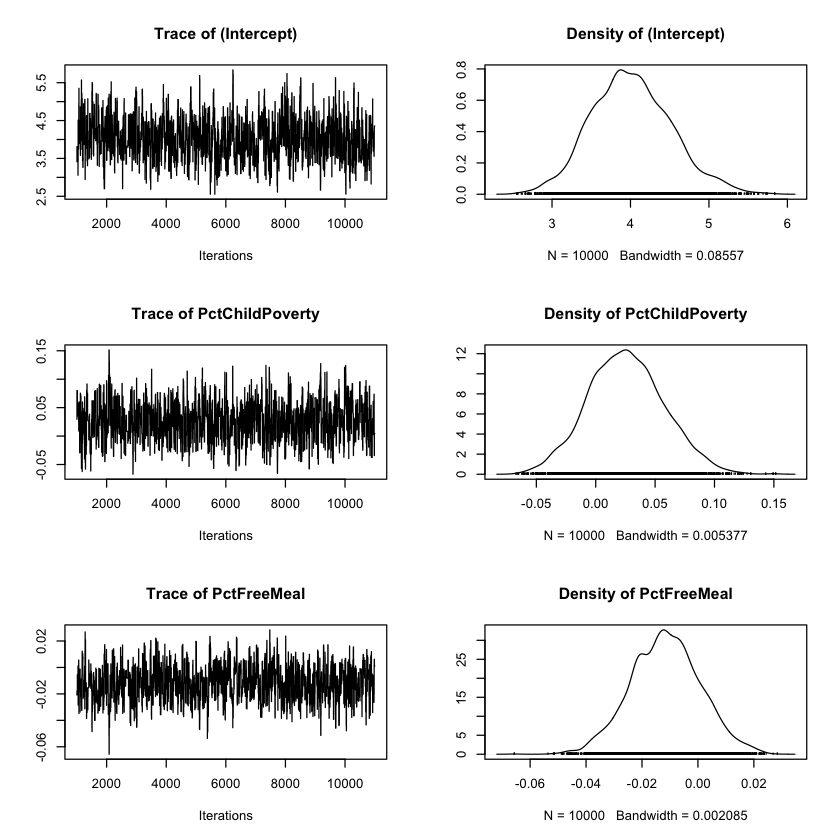

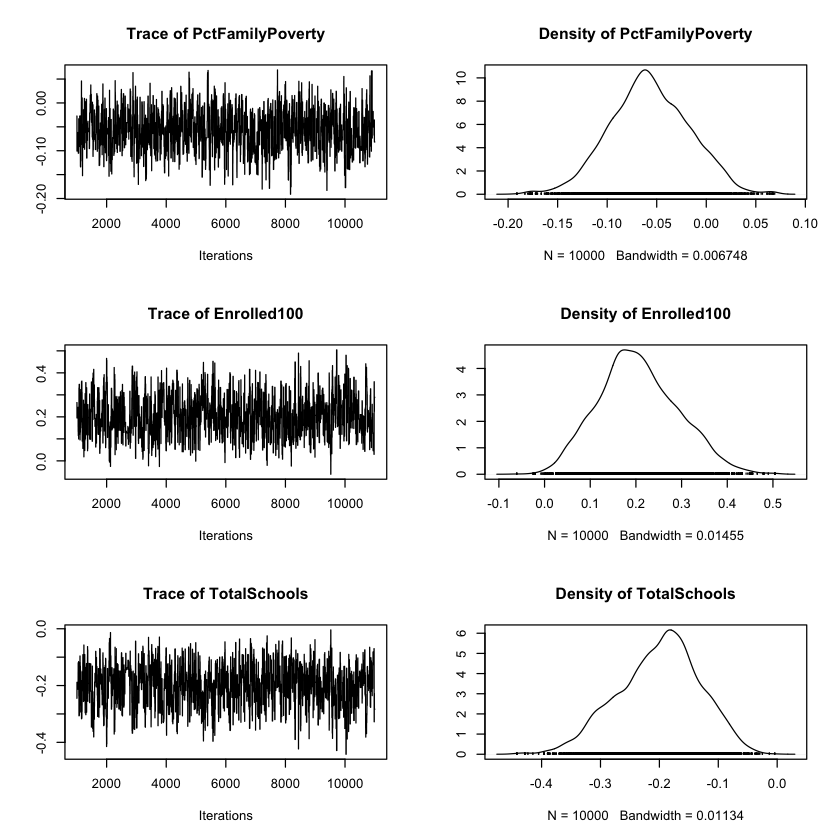

In [314]:
formula_str = paste(pred_col_num, '~ PctChildPoverty + PctFreeMeal + PctFamilyPoverty + Enrolled100 + Enrolled100 + TotalSchools')
bayesLogitOut <- MCMClogit(formula =as.formula(formula_str), data=districts) 
summary(bayesLogitOut) # Summarize the results
plot(bayesLogitOut)

In [321]:
exp(summary(bayesLogitOut)$statistics[, 'Mean'])

(Intercept)  PctChildPoverty      PctFreeMeal PctFamilyPoverty 
      55.3281251        1.0260668        0.9885328        0.9445810 
     Enrolled100     TotalSchools 
       1.2278086        0.8181969

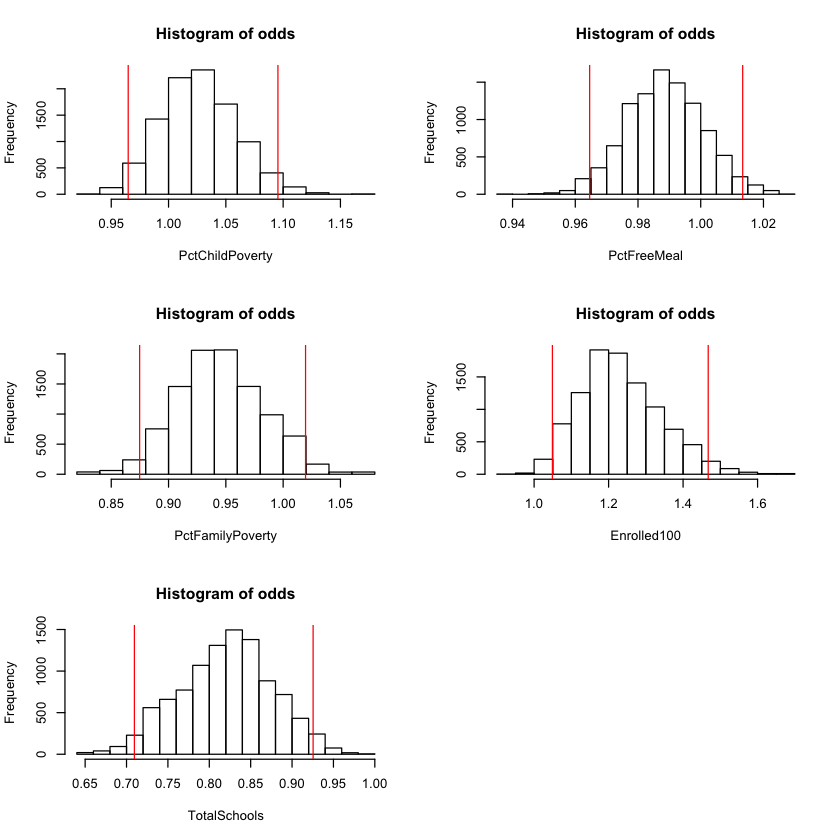

In [317]:
par(mfrow = c(3,2))
for (x in c('PctChildPoverty','PctFreeMeal','PctFamilyPoverty','Enrolled100','TotalSchools')) {
    odds <- as.matrix(bayesLogitOut[,x]) # Create a matrix for apply() 
    odds <- apply(odds,1,exp) # apply() runs exp() for each one 
    hist(odds, xlab=x) # Show a histogram 
    abline(v=quantile(odds,c(0.025)),col="red") # Left edge of 95% HDI 
    abline(v=quantile(odds,c(0.975)),col="red") # Right edge of 95% HDI
}

## Question 6
6.	What variables predict the percentage of all enrolled students with completely up-to-date vaccines?

In [382]:
pred_col <- 'PctUpToDate'

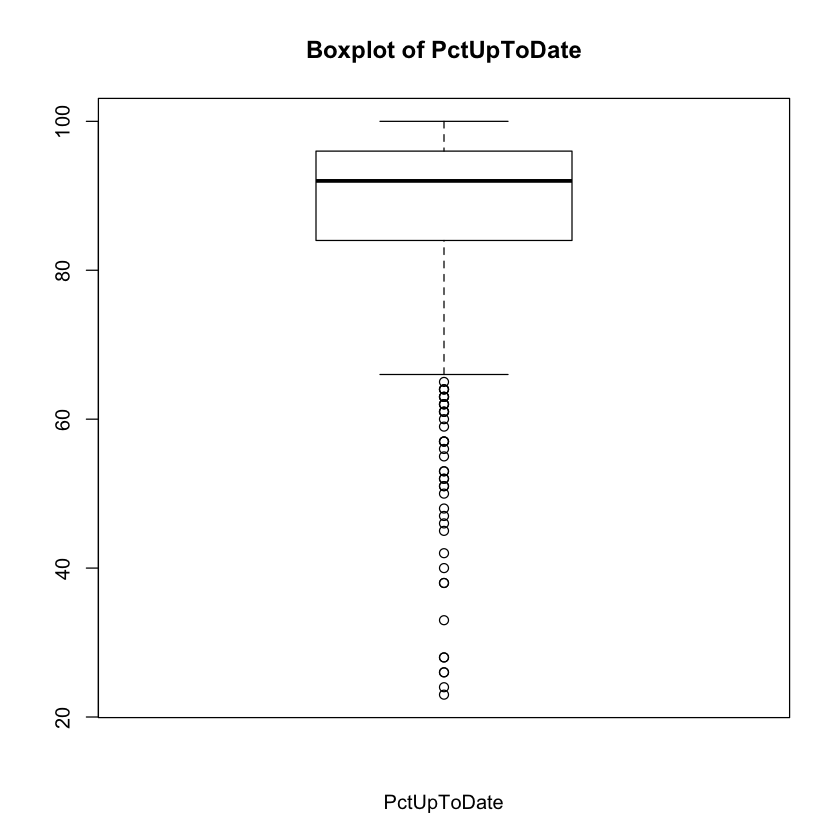

In [384]:
boxplot(districts[, pred_col], main=paste('Boxplot of', pred_col), xlab=pred_col)

,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools,PctUpToDate
PctChildPoverty,1.00000000,0.75187546,0.85101699,-0.01439864,-0.02409280,0.1914035
PctFreeMeal,0.75187546,1.00000000,0.71644320,0.08390907,0.06661373,0.2505602
PctFamilyPoverty,0.85101699,0.71644320,1.00000000,0.04084347,0.02580181,0.2392214
Enrolled,-0.01439864,0.08390907,0.04084347,1.00000000,0.97015737,0.1804792
TotalSchools,-0.02409280,0.06661373,0.02580181,0.97015737,1.00000000,0.1377456
PctUpToDate,0.19140352,0.25056018,0.23922143,0.18047920,0.13774562,1.0000000


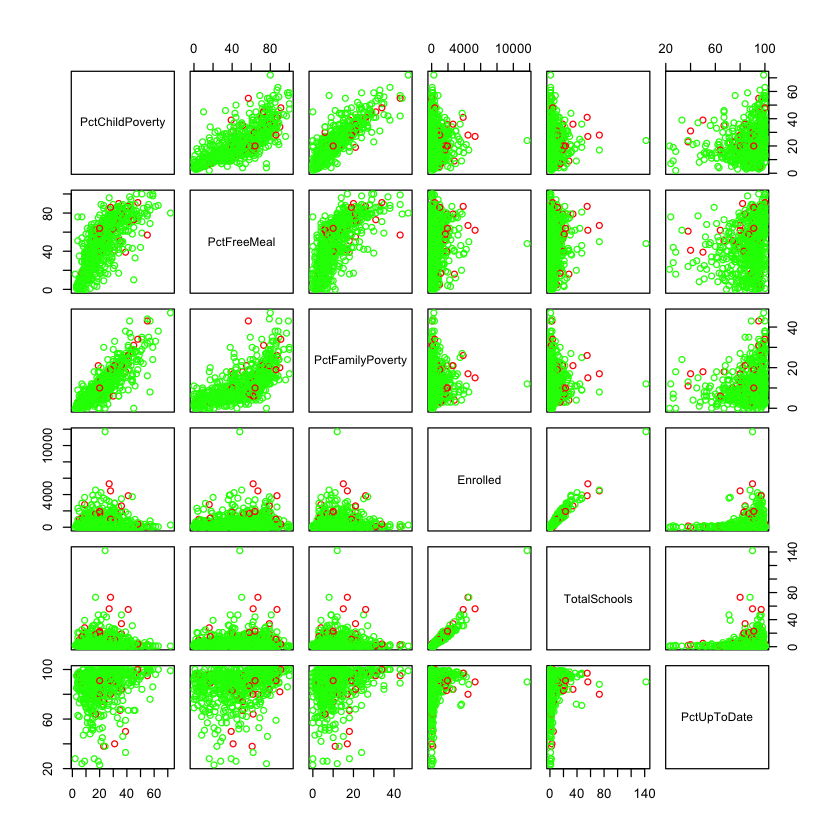

In [337]:
pairs(districts[, append(pred_cols, c(pred_col))], col=cols)
cor(districts[,append(pred_cols, c(pred_col))])

#### GSM with Logistic Regression

##### Linear Regression for Collinearity Frequentist

In [346]:
formula_str = paste(pred_col, ' ~ PctChildPoverty + PctFreeMeal + PctFamilyPoverty + Enrolled + TotalSchools')
lmOut <- lm(formula_str, data=districts)
summary(lmOut)
round(coef(lmOut), 3)


Call:
lm(formula = formula_str, data = districts)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.603  -3.301   2.862   7.322  19.368 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      81.584071   1.095964  74.440  < 2e-16 ***
PctChildPoverty  -0.106260   0.079393  -1.338 0.181202    
PctFreeMeal       0.087962   0.029228   3.010 0.002712 ** 
PctFamilyPoverty  0.301841   0.111558   2.706 0.006984 ** 
Enrolled          0.010185   0.002134   4.773 2.21e-06 ***
TotalSchools     -0.717208   0.187052  -3.834 0.000137 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.97 on 693 degrees of freedom
Multiple R-squared:  0.1179,	Adjusted R-squared:  0.1115 
F-statistic: 18.52 on 5 and 693 DF,  p-value: < 2.2e-16


(Intercept)  PctChildPoverty      PctFreeMeal PctFamilyPoverty 
          81.584           -0.106            0.088            0.302 
        Enrolled     TotalSchools 
           0.010           -0.717

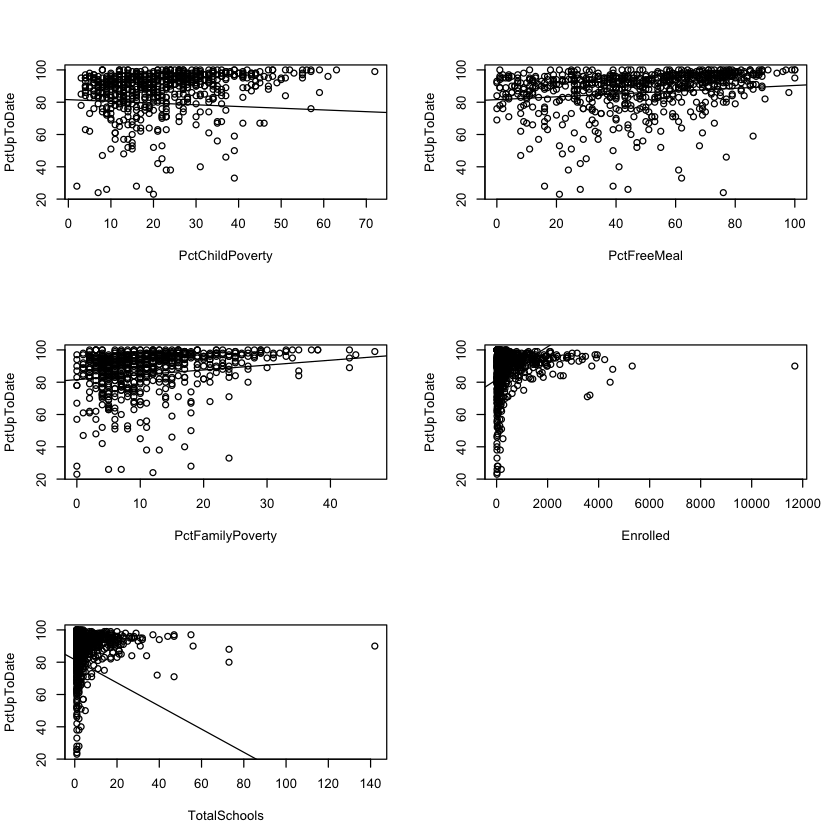

In [347]:
par(mfrow = c(3,2))
for (x in pred_cols){
    plot(districts[, x], districts[, pred_col], xlab=x, ylab=pred_col)
    abline(lmOut$coefficients[c('(Intercept)', x)], col = "black")
}

##### Linear Regression for Collinearity Bayesian

In [360]:
summary(regOutMCMC)$statistics[, 'Mean']

mu  PctChildPoverty      PctFreeMeal PctFamilyPoverty 
    87.856913703     -0.103101171      0.084920961      0.292652872 
        Enrolled     TotalSchools             sig2                g 
     0.009874073     -0.695586466    143.299736357      0.063650108

In [375]:
formula_str = paste(pred_col, '~ PctChildPoverty + PctFreeMeal + PctFamilyPoverty + Enrolled + TotalSchools')
regOutMCMC <- lmBF(as.formula(formula_str), data=districts, posterior=TRUE, iterations=10000)
regOutBF <- lmBF(as.formula(formula_str), data=districts)
summary(regOutMCMC)
summary(regOutMCMC)$statistics[, 'Mean']
regOutBF


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                       Mean       SD  Naive SE Time-series SE
mu                87.854643 0.451659 4.517e-03      4.517e-03
PctChildPoverty   -0.103859 0.078196 7.820e-04      7.820e-04
PctFreeMeal        0.085855 0.028926 2.893e-04      2.893e-04
PctFamilyPoverty   0.290449 0.110111 1.101e-03      1.101e-03
Enrolled           0.009812 0.002106 2.106e-05      2.106e-05
TotalSchools      -0.690303 0.183772 1.838e-03      1.838e-03
sig2             143.299136 7.724907 7.725e-02      7.725e-02
g                  0.063617 0.057932 5.793e-04      5.963e-04

2. Quantiles for each variable:

                       2.5%        25%        50%       75%     97.5%
mu                86.983577  87.555129  87.849093  88.15394  88.74826
PctChildPoverty   -0.259276  -0.156214  -0.103801  -0.05270   0.04959
Pc

mu  PctChildPoverty      PctFreeMeal PctFamilyPoverty 
    87.854642876     -0.103858809      0.085855183      0.290449468 
        Enrolled     TotalSchools             sig2                g 
     0.009811757     -0.690303362    143.299135557      0.063617427

Bayes factor analysis
--------------
[1] PctChildPoverty + PctFreeMeal + PctFamilyPoverty + Enrolled + TotalSchools : 1.018477e+14 ±0.01%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS


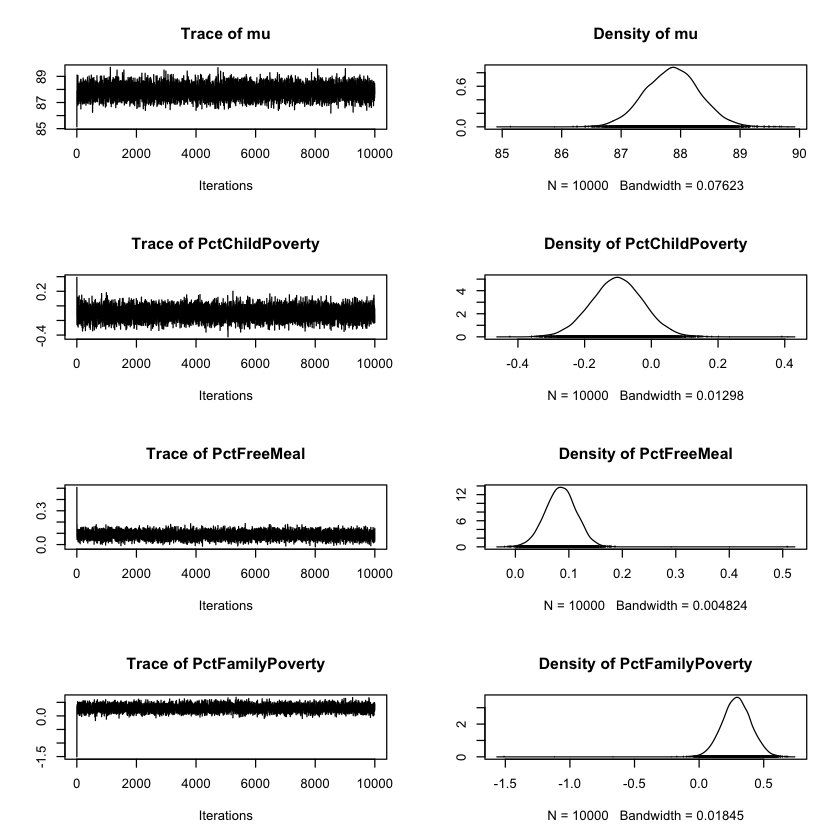

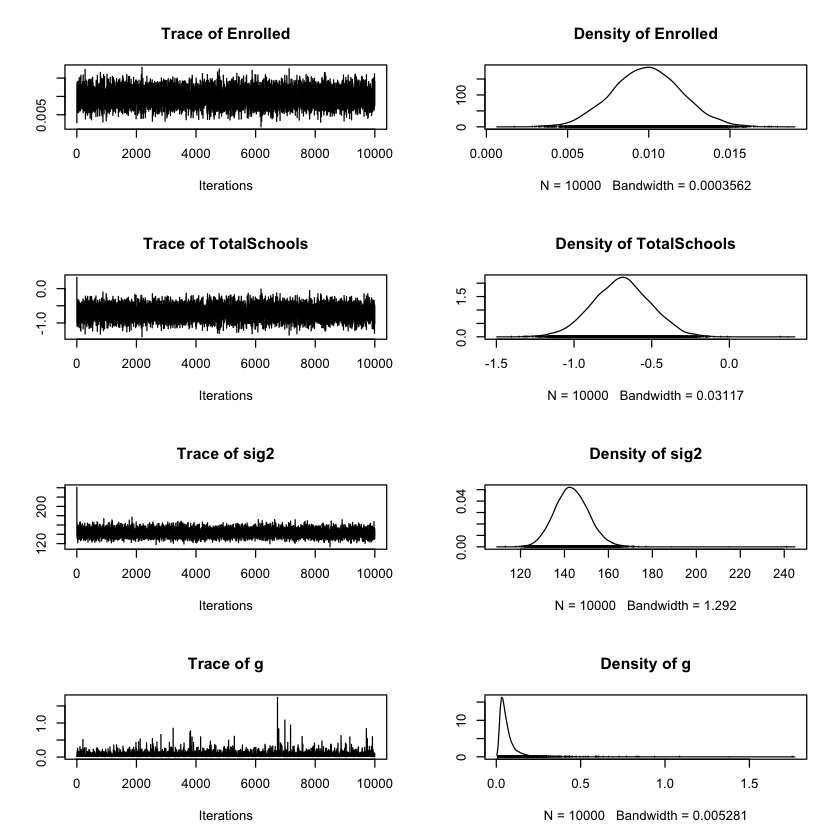

In [349]:
plot(regOutMCMC)

[1] 0.1119897

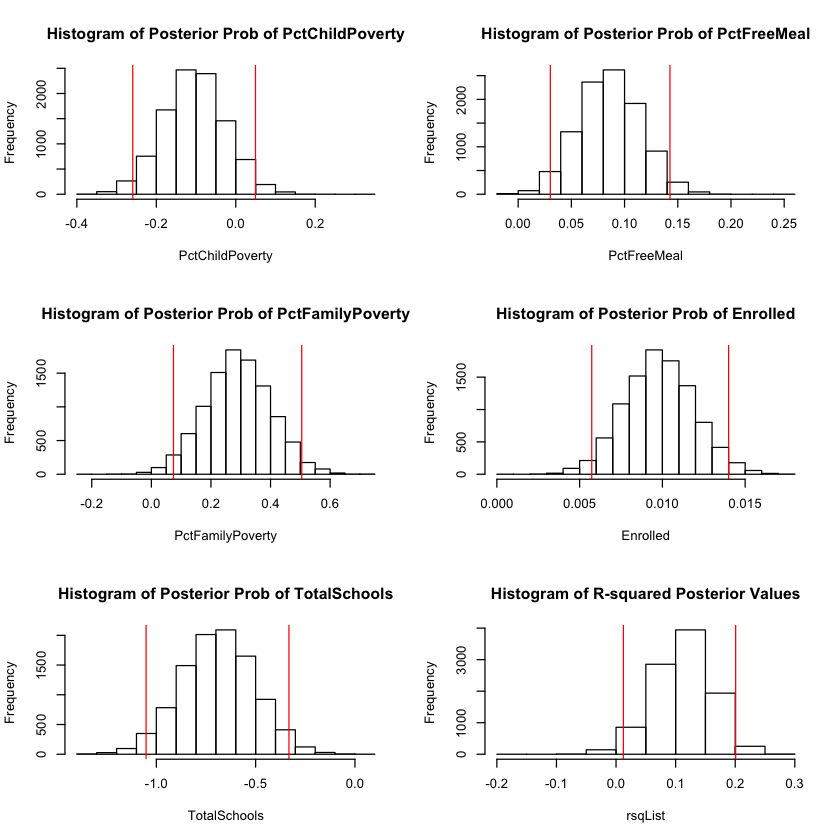

In [377]:
rsqList <- 1 - (regOutMCMC[,"sig2"] / var(districts[, pred_col])) # sig2 from lmBF() estimates error variance

par(mfrow = c(3,2))

for (x in pred_cols){
    hist(regOutMCMC[,x], xlab=x, main=paste('Histogram of Posterior Prob of', x))
    abline(v=quantile(regOutMCMC[,x],c(0.025)), col="red") 
    abline(v=quantile(regOutMCMC[,x],c(0.975)), col="red")
}

mean(rsqList) # Overall mean R-squared is 0.75 
hist(rsqList, main='Histogram of R-squared Posterior Values') # Show a histogram
# Lower bound of the 95% HDI 
abline(v=quantile(rsqList,c(0.025)), col="red")
# Upper bound of the 95% HDI 
abline(v=quantile(rsqList,c(0.975)), col="red")

## Question 7
7.	What variables predict the percentage of all enrolled students with belief exceptions?

In [393]:
pred_col <- 'PctBeliefExempt'

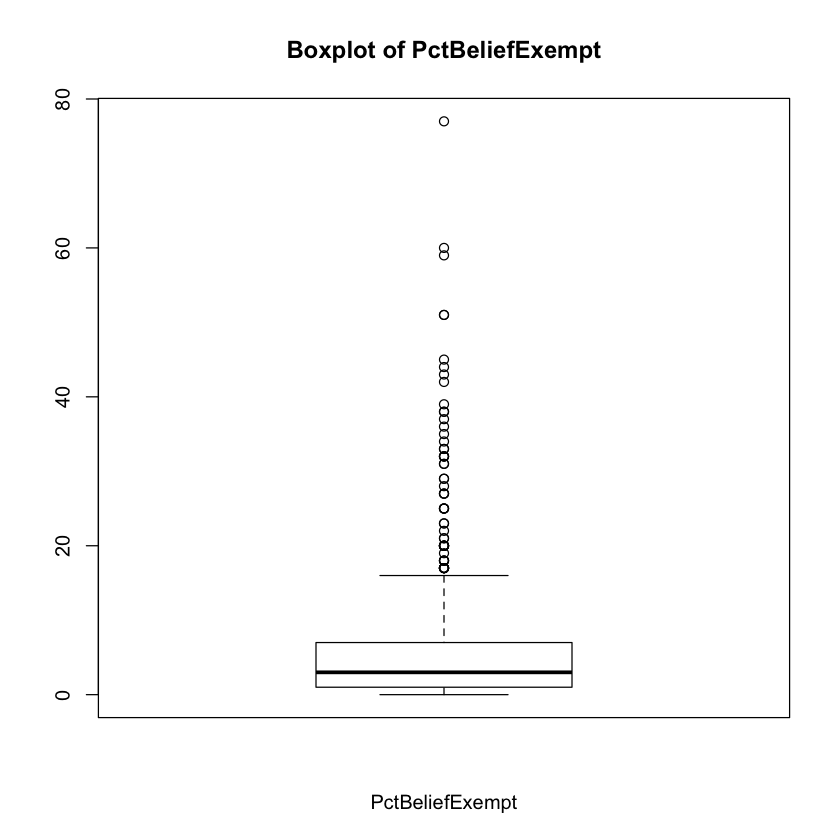

In [394]:
boxplot(districts[, pred_col], main=paste('Boxplot of', pred_col), xlab=pred_col)

,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools,PctBeliefExempt
PctChildPoverty,1.00000000,0.75187546,0.85101699,-0.01439864,-0.02409280,-0.1661111
PctFreeMeal,0.75187546,1.00000000,0.71644320,0.08390907,0.06661373,-0.2844006
PctFamilyPoverty,0.85101699,0.71644320,1.00000000,0.04084347,0.02580181,-0.2276003
Enrolled,-0.01439864,0.08390907,0.04084347,1.00000000,0.97015737,-0.1959573
TotalSchools,-0.02409280,0.06661373,0.02580181,0.97015737,1.00000000,-0.1633697
PctBeliefExempt,-0.16611109,-0.28440060,-0.22760030,-0.19595735,-0.16336972,1.0000000


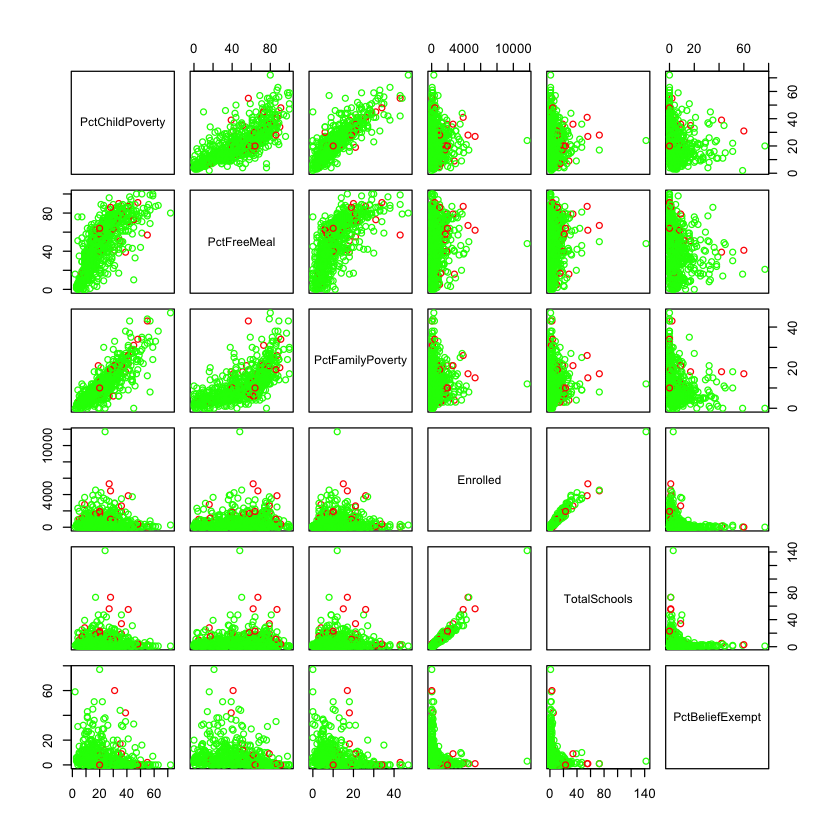

In [395]:
pairs(districts[, append(pred_cols, c(pred_col))], col=cols)
cor(districts[,append(pred_cols, c(pred_col))])

#### GSM with Logistic Regression

##### Linear Regression for Collinearity Frequentist

In [405]:
formula_str = paste(pred_col, ' ~ PctChildPoverty + PctFreeMeal + PctFamilyPoverty + Enrolled + TotalSchools')
lmOut <- lm(formula_str, data=districts)
summary(lmOut)
confint(lmOut)
coef(lmOut)


Call:
lm(formula = formula_str, data = districts)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.778  -4.188  -2.029   1.356  65.288 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      10.409240   0.760733  13.683  < 2e-16 ***
PctChildPoverty   0.163897   0.055108   2.974 0.003041 ** 
PctFreeMeal      -0.106588   0.020288  -5.254 1.99e-07 ***
PctFamilyPoverty -0.216453   0.077435  -2.795 0.005329 ** 
Enrolled         -0.005280   0.001481  -3.565 0.000389 ***
TotalSchools      0.331600   0.129837   2.554 0.010863 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.311 on 693 degrees of freedom
Multiple R-squared:  0.132,	Adjusted R-squared:  0.1257 
F-statistic: 21.08 on 5 and 693 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),8.915623322,11.902857619
PctChildPoverty,0.055697752,0.272096864
PctFreeMeal,-0.146421528,-0.066755394
PctFamilyPoverty,-0.368488320,-0.064417536
Enrolled,-0.008187741,-0.002371884
TotalSchools,0.076678425,0.586520983


(Intercept)  PctChildPoverty      PctFreeMeal PctFamilyPoverty 
    10.409240471      0.163897308     -0.106588461     -0.216452928 
        Enrolled     TotalSchools 
    -0.005279813      0.331599704

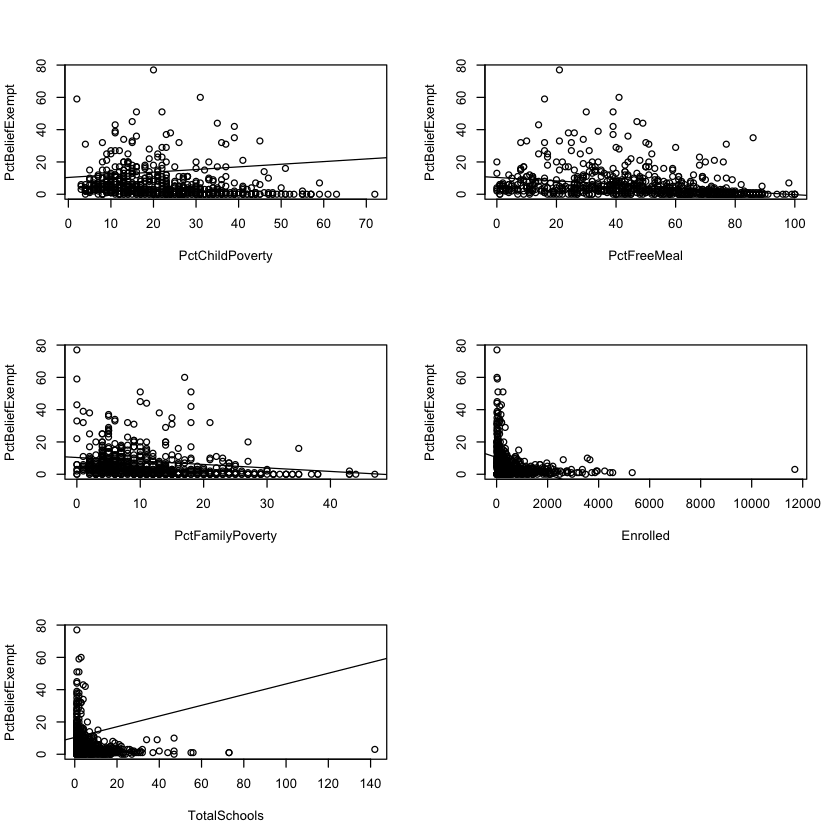

In [398]:
par(mfrow = c(3,2))
for (x in pred_cols){
    plot(districts[, x], districts[, pred_col], xlab=x, ylab=pred_col)
    abline(lmOut$coefficients[c('(Intercept)', x)], col = "black")
}

##### Linear Regression for Collinearity Bayesian

In [401]:
formula_str = paste(pred_col, '~ PctChildPoverty + PctFreeMeal + PctFamilyPoverty + Enrolled + TotalSchools')
regOutMCMC <- lmBF(as.formula(formula_str), data=districts, posterior=TRUE, iterations=10000)
regOutBF <- lmBF(as.formula(formula_str), data=districts)
summary(regOutMCMC)
summary(regOutMCMC)$statistics[, 'Mean']
regOutBF


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                     Mean       SD  Naive SE Time-series SE
mu                5.71002 0.313963 3.140e-03      3.240e-03
PctChildPoverty   0.15979 0.054123 5.412e-04      5.412e-04
PctFreeMeal      -0.10365 0.020285 2.029e-04      2.029e-04
PctFamilyPoverty -0.21044 0.076133 7.613e-04      7.613e-04
Enrolled         -0.00513 0.001471 1.471e-05      1.471e-05
TotalSchools      0.32241 0.129086 1.291e-03      1.291e-03
sig2             69.08373 3.693309 3.693e-02      3.649e-02
g                 0.06755 0.065002 6.500e-04      6.472e-04

2. Quantiles for each variable:

                      2.5%       25%      50%       75%     97.5%
mu                5.101558  5.497042  5.71019  5.921093  6.330966
PctChildPoverty   0.054028  0.122814  0.15996  0.195722  0.265154
PctFreeMeal      -0.143785 -0.11

mu  PctChildPoverty      PctFreeMeal PctFamilyPoverty 
     5.710020990      0.159791690     -0.103650553     -0.210443510 
        Enrolled     TotalSchools             sig2                g 
    -0.005130333      0.322407608     69.083729925      0.067551614

Bayes factor analysis
--------------
[1] PctChildPoverty + PctFreeMeal + PctFamilyPoverty + Enrolled + TotalSchools : 2.349465e+16 ±0%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS


[1] 0.1253546

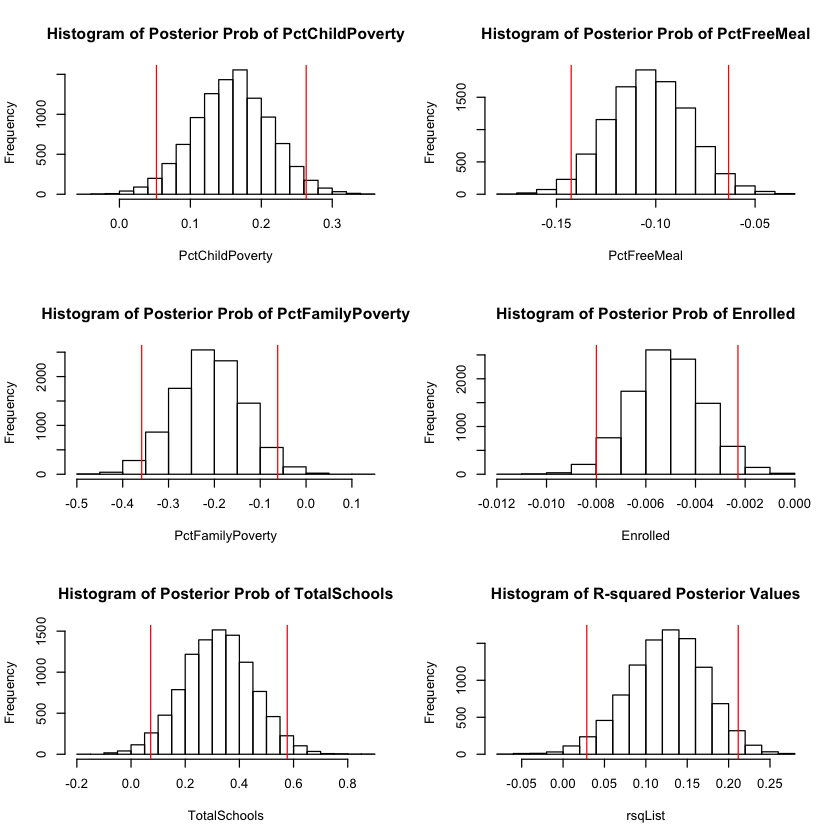

In [400]:
rsqList <- 1 - (regOutMCMC[,"sig2"] / var(districts[, pred_col])) # sig2 from lmBF() estimates error variance

par(mfrow = c(3,2))

for (x in pred_cols){
    hist(regOutMCMC[,x], xlab=x, main=paste('Histogram of Posterior Prob of', x))
    abline(v=quantile(regOutMCMC[,x],c(0.025)), col="red") 
    abline(v=quantile(regOutMCMC[,x],c(0.975)), col="red")
}

mean(rsqList) # Overall mean R-squared is 0.75 
hist(rsqList, main='Histogram of R-squared Posterior Values') # Show a histogram
# Lower bound of the 95% HDI 
abline(v=quantile(rsqList,c(0.025)), col="red")
# Upper bound of the 95% HDI 
abline(v=quantile(rsqList,c(0.975)), col="red")

## Question 8
8.	What’s the big picture, based on all of the foregoing analyses? The staff member in the state legislator’s office is interested to know how to allocate financial assistance to school districts to improve both their vaccination rates and their reporting compliance. What have you learned from the data and analyses that might inform this question?